In [3]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE # for using the Recursive Feature Selection method for feature selection
from sklearn.linear_model import LinearRegression # for using LinearRegression class to run RFE method
import statsmodels.api as sm # for building linear regression models
from statsmodels.stats.outliers_influence import variance_inflation_factor # to compute the VIF of the variables
from sklearn.metrics import mean_squared_error # for checking the mean squared error
from sklearn.metrics import mean_absolute_error # for checking the mean absolute error
from sklearn.metrics import r2_score # to check the r-squared

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor

In [324]:
import keras
import matplotlib
import seaborn

In [319]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.15.0
Keras version: 2.15.0


In [325]:
print("scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)

scikit-learn version: 1.2.1
Matplotlib version: 3.7.0
Seaborn version: 0.12.2


In [275]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Input, Attention, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
# import data
df = pd.read_csv("data.csv")

# shape of the data
df.shape

(1048571, 7)

In [23]:
df.head()

setpoint  outside_temp  return_temp  supply_temp  power_input  \
0       7.0       22.3764      8.21838      7.02139         16.0   
1       7.0       22.3764      8.21838      7.02139         16.0   
2       7.0       22.3764      8.21838      7.02139         16.0   
3       7.0       22.3764      8.21838      7.02139         16.0   
4       7.0       22.3764      8.21838      7.02139         16.0   

                  time  building_load  
0  2021-01-01 00:00:00         78.537  
1  2021-01-01 00:01:00         78.537  
2  2021-01-01 00:02:00         78.537  
3  2021-01-01 00:03:00         78.537  
4  2021-01-01 00:04:00         78.537

In [24]:
# changing the 'time' column to datetime datatype
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   setpoint       1048571 non-null  float64       
 1   outside_temp   1048571 non-null  float64       
 2   return_temp    1048571 non-null  float64       
 3   supply_temp    1048571 non-null  float64       
 4   power_input    1048571 non-null  float64       
 5   time           1048571 non-null  datetime64[ns]
 6   building_load  1048571 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 56.0 MB


In [264]:
df.describe()

setpoint  outside_temp   return_temp   supply_temp   power_input  \
count  1.048571e+06  1.048571e+06  1.048571e+06  1.048571e+06  1.048571e+06   
mean   8.229395e+00  3.088360e+01  9.809552e+00  8.993532e+00  1.922986e+01   
std    1.523097e+00  7.113727e+00  2.385754e+00  2.654490e+00  1.648687e+01   
min    4.000000e+00  1.240050e+01  5.676610e+00  4.092480e+00  0.000000e+00   
25%    7.000000e+00  2.514290e+01  8.471890e+00  7.106170e+00  0.000000e+00   
50%    7.301170e+00  3.095400e+01  9.148990e+00  8.121730e+00  1.850000e+01   
75%    1.000000e+01  3.803080e+01  1.092620e+01  1.027625e+01  3.581250e+01   
max    1.200000e+01  4.903490e+01  3.424220e+01  3.417450e+01  2.048032e+03   

       building_load  
count   1.048571e+06  
mean    7.530343e+01  
std     5.976936e+01  
min     0.000000e+00  
25%     0.000000e+00  
50%     8.355000e+01  
75%     1.253250e+02  
max     3.342000e+02

**Setpoint (°C)**- Leaving chilled water temperature setpoint which the chiller tries to maintain

**OAT (°C)**- Outside Air Temperature

**c1_power (kW)** - Power Consumed by the circuit no. 1 of the chiller

**c2_power (kW)** - Power Consumed by the circuit no. 2 of the chiller

**EvapPdRate (°C/min)** - Evaporator Pull Down Rate

**EWT (°C)**- Entering water temperature to the chiller

**LWT (°C)**- Leaving water temperature from the chiller

**Capacity (%)** - Actual Capacity of the chiller, also considered as the building load since there is only 01 chiller in the plant

**Chiller Capacity** - 334.2 kW

**Design flow** - 8.9 l/s

**Design EWT**- 14.5 °C

**Design LWT** - 5.5 °C

**Design Power Input** - 134.5 kW

## Data Analysis & Visualisation

## Univariate Analysis

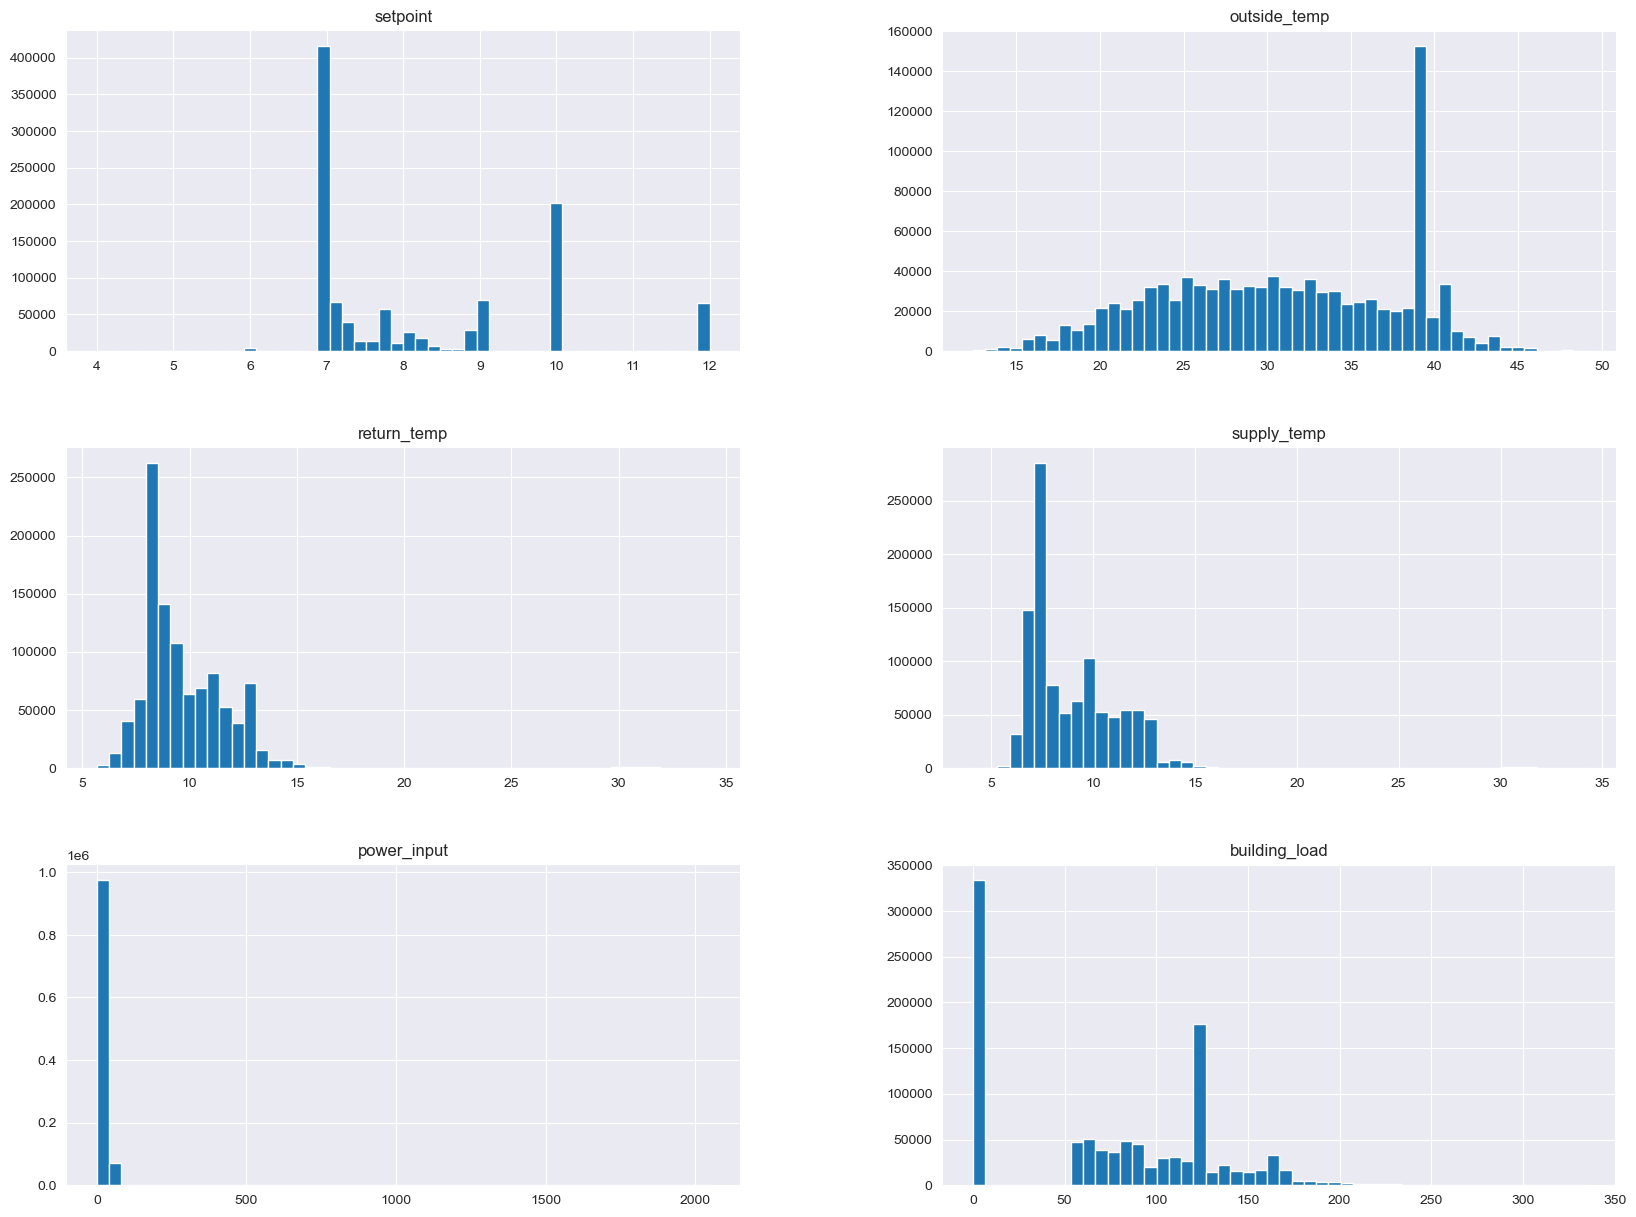

In [238]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Removing Outliers

In [25]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

### Derived Metrics

In [26]:
# creating a column "month" and "day" from "time" column
df['month'] = df['time'].dt.strftime('%B')
df['day'] = df['time'].dt.strftime('%A')

# dropping the time column as well since we have derived the important columns already
df = df.drop(['time'], axis=1)

### Visualization

In [239]:
# Creating a function 'create_distplot' since we will keep needing to create plots under univariate analysis
# So in order to avoid repetitive code writing, we will create this function here.

def create_distplot(x, x_label, y, palette_color):
    plt.figure(figsize=[10,8])
    sns.set_style("dark")
    sns.distplot(df[x], bins=25, color=palette_color)
    plt.title(y, fontsize=15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Density",fontsize=14)
    plt.show()

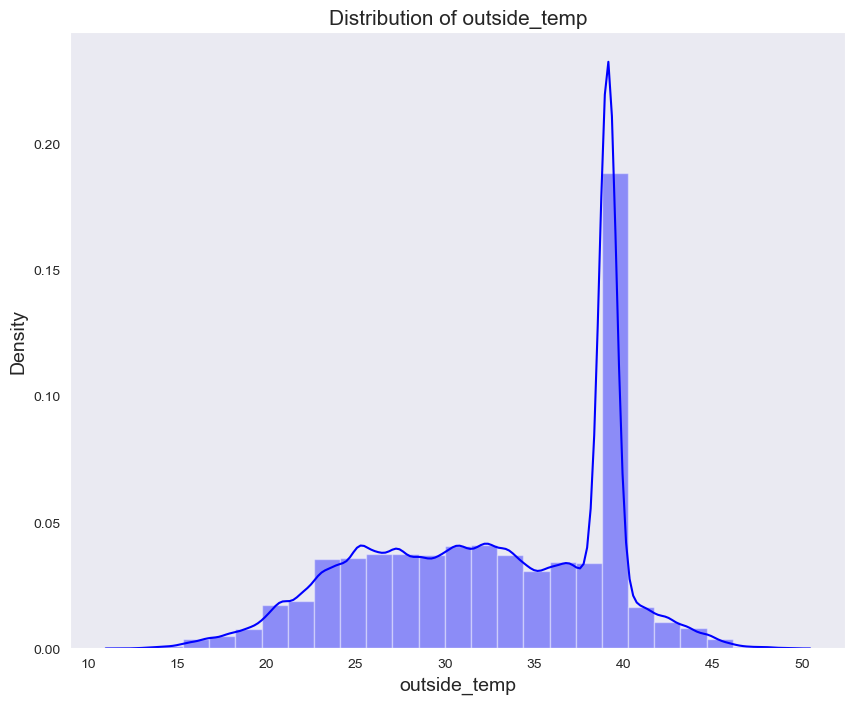

In [260]:
# analysing 'outside_temp' column

create_distplot('outside_temp', 'outside_temp', 'Distribution of outside_temp', 'b')

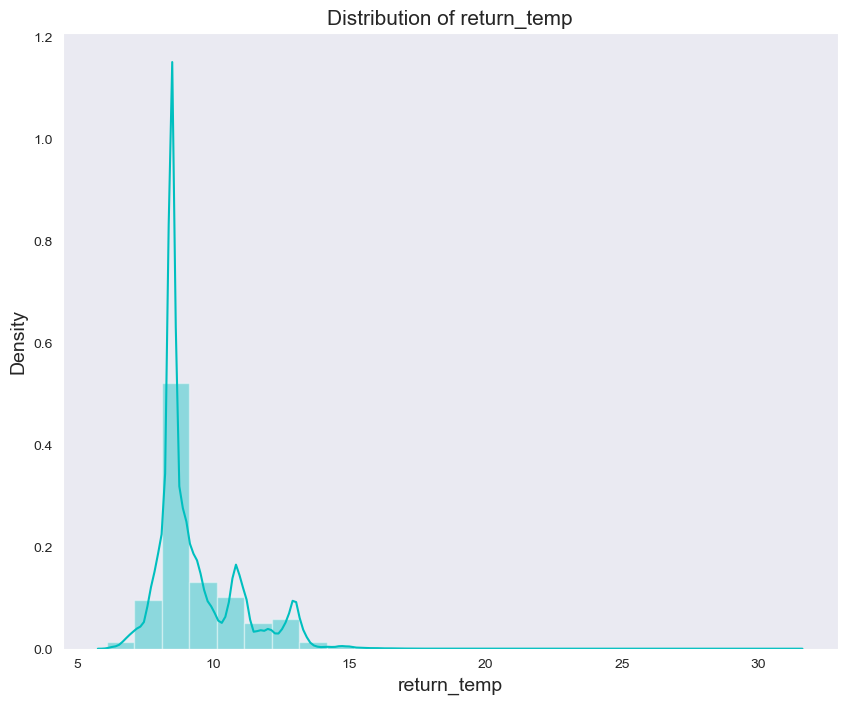

In [261]:
# analysing 'return_temp' column

create_distplot('return_temp', 'return_temp', 'Distribution of return_temp', 'c')

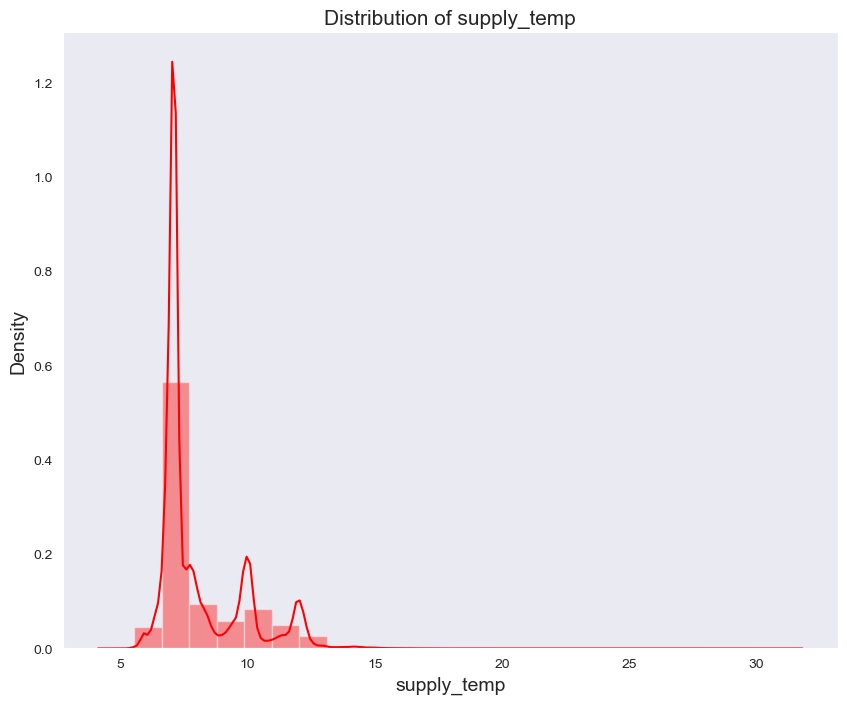

In [262]:
# analysing 'supply_temp' column

create_distplot('supply_temp', 'supply_temp', 'Distribution of supply_temp', 'r')

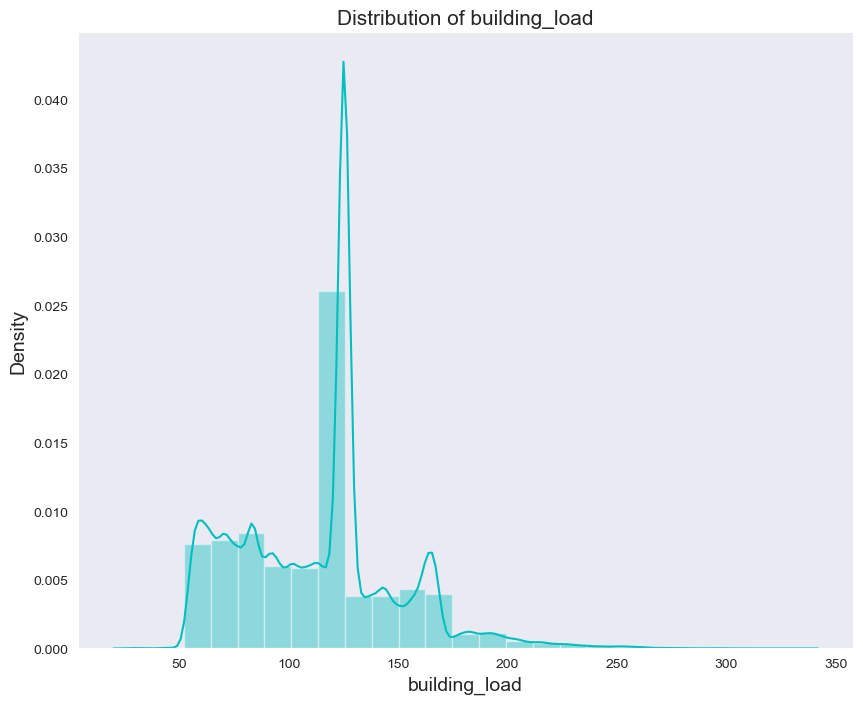

In [263]:
# analysing 'building_load' column

create_distplot('building_load', 'building_load', 'Distribution of building_load', 'c')

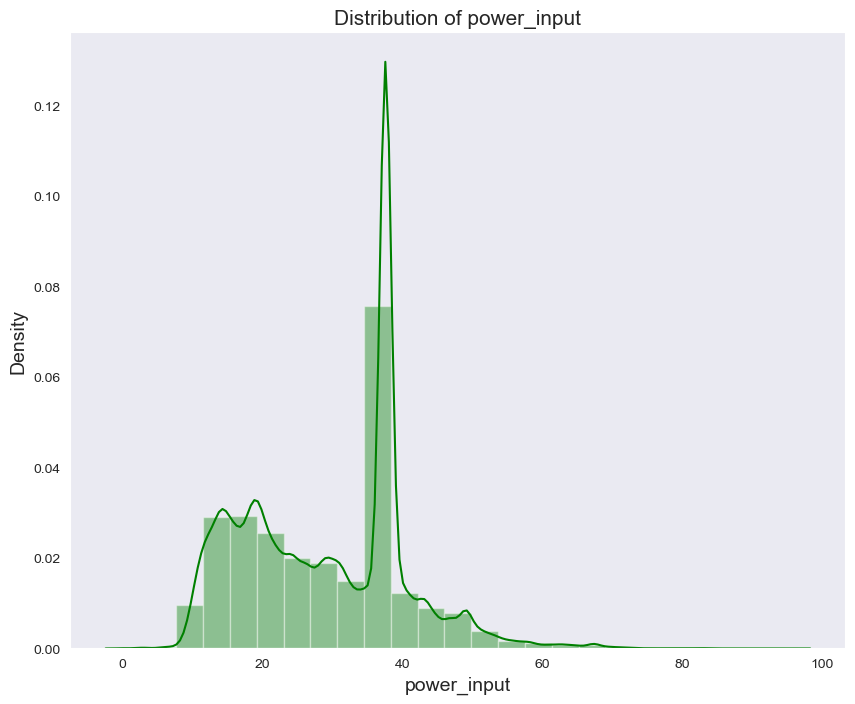

In [264]:
# analysing 'power_input' column

create_distplot('power_input', 'power_input', 'Distribution of power_input', 'g')

In [245]:
df.columns

Index(['setpoint', 'outside_temp', 'return_temp', 'supply_temp', 'power_input',
       'time', 'building_load'],
      dtype='object')

## Bivariate Analysis

#### Analysing the continuous variables

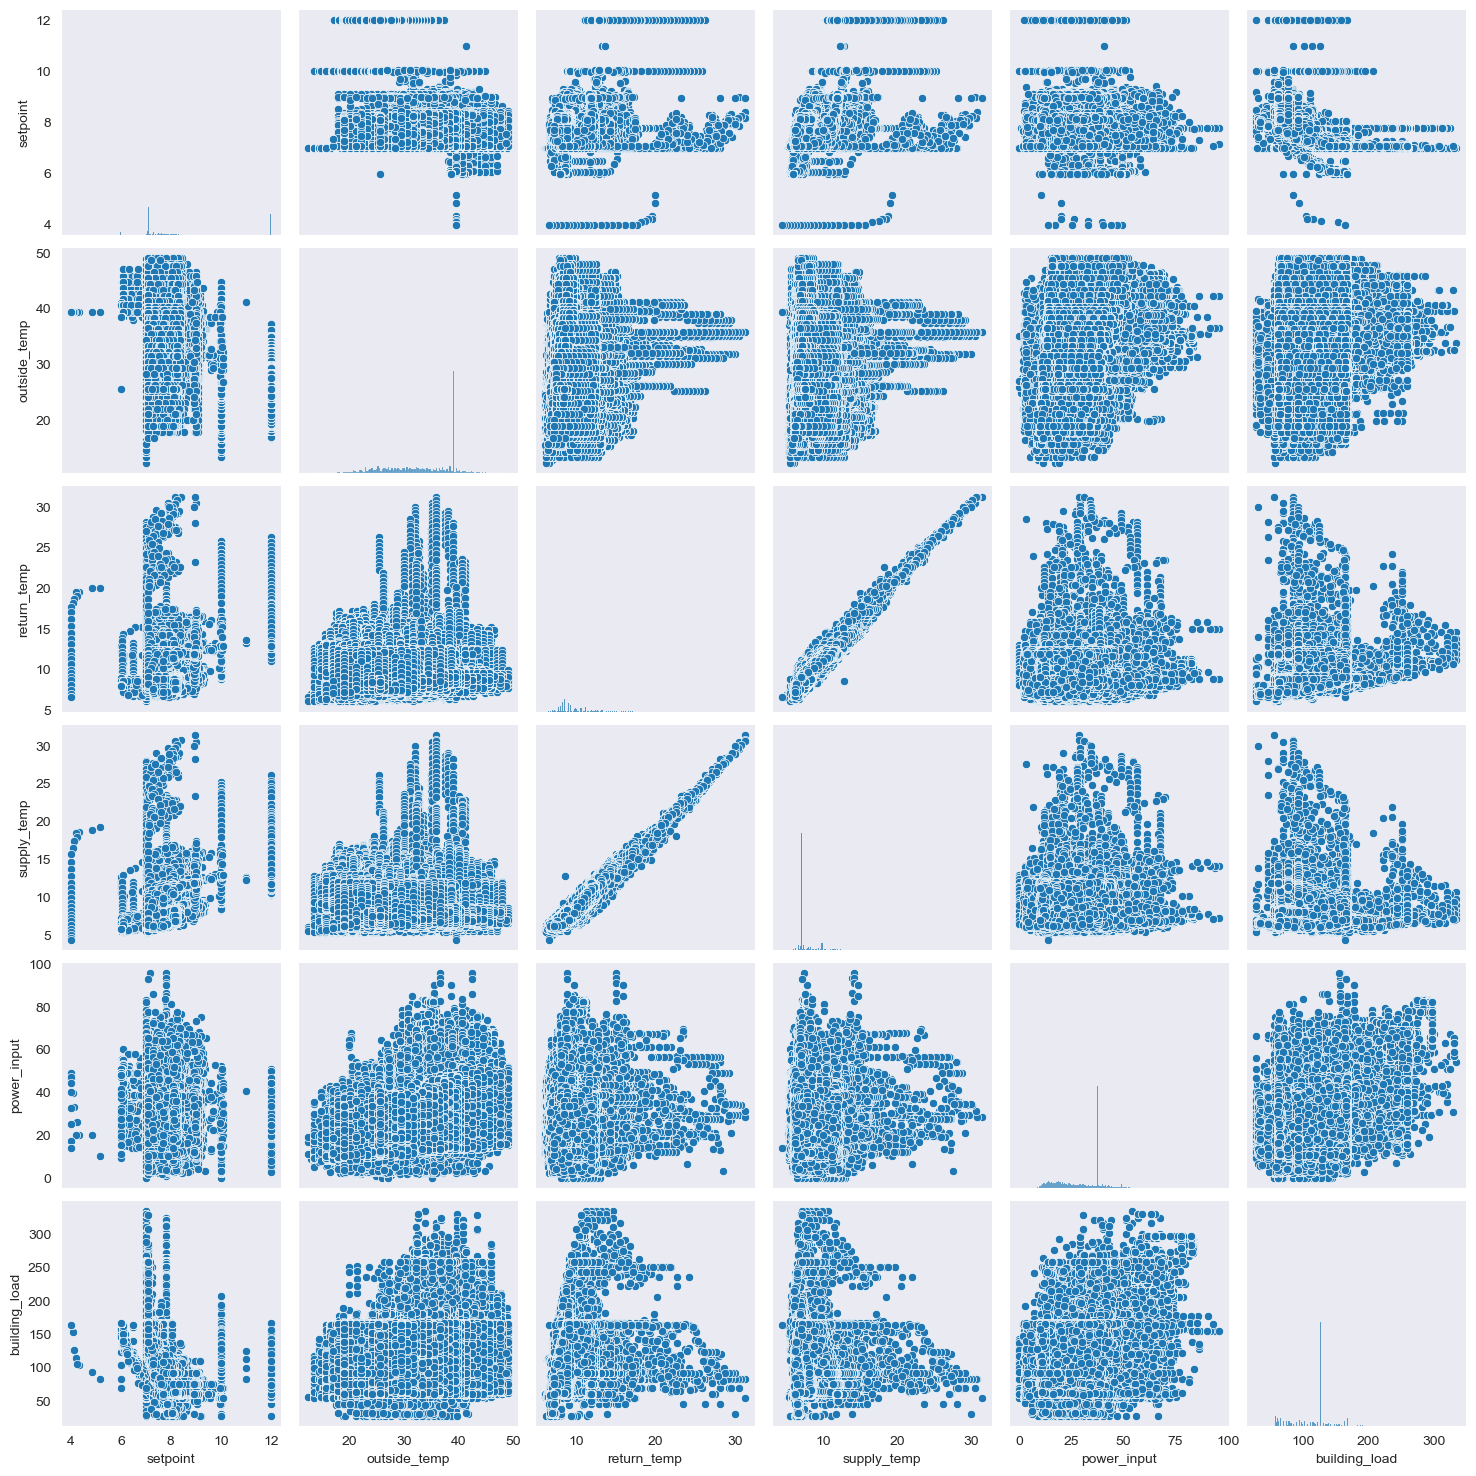

In [265]:
# creating scatter plots between all the continuous variables using pairplot

sns.pairplot(df, vars = ['setpoint', 'outside_temp', 'return_temp', 'supply_temp', 'power_input', 'building_load'])
plt.show()

<Axes: xlabel='building_load', ylabel='power_input'>

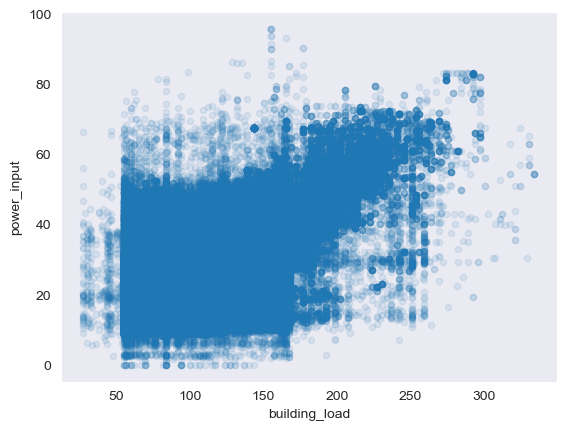

In [266]:
df.plot(kind="scatter", x = "building_load", y="power_input", alpha=0.1)

<Axes: xlabel='outside_temp', ylabel='power_input'>

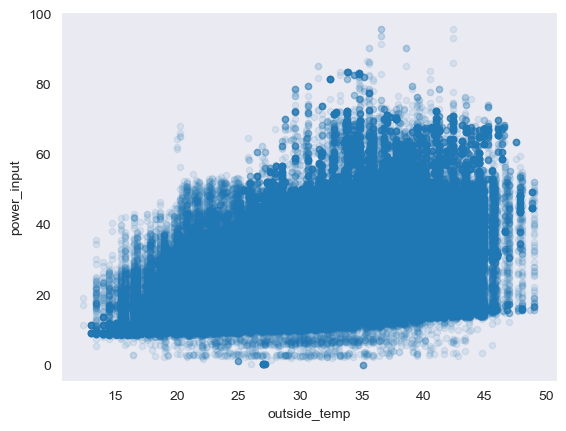

In [267]:
df.plot(kind="scatter", x = "outside_temp", y="power_input", alpha=0.1)

<Axes: xlabel='supply_temp', ylabel='power_input'>

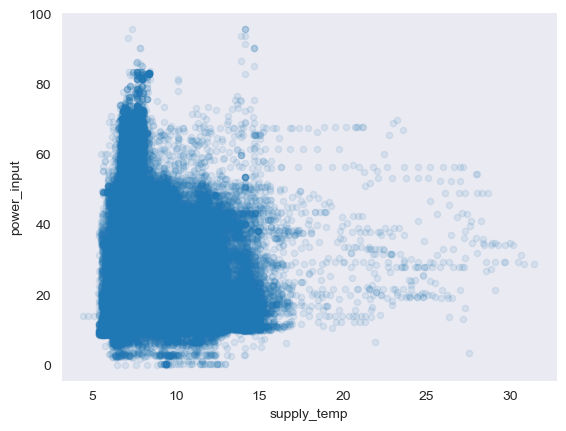

In [268]:
df.plot(kind="scatter", x = "supply_temp", y="power_input", alpha=0.1)

<Axes: xlabel='return_temp', ylabel='power_input'>

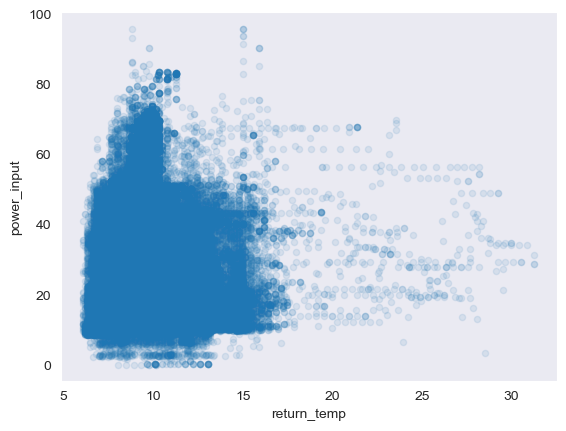

In [269]:
df.plot(kind="scatter", x = "return_temp", y="power_input", alpha=0.1)

<Axes: xlabel='setpoint', ylabel='power_input'>

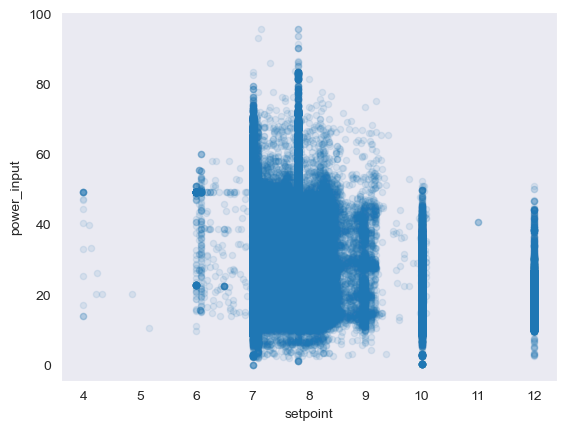

In [272]:
df.plot(kind="scatter", x = "setpoint", y="power_input", alpha=0.1)

In [157]:
# checking correlation matrix

corr_matrix = df.corr()
corr_matrix["power_input"].sort_values(ascending=False)

power_input      1.000000
building_load    0.659384
outside_temp     0.587385
return_temp     -0.289408
supply_temp     -0.409461
setpoint        -0.478749
Name: power_input, dtype: float64

#### Analysing the categorical variables

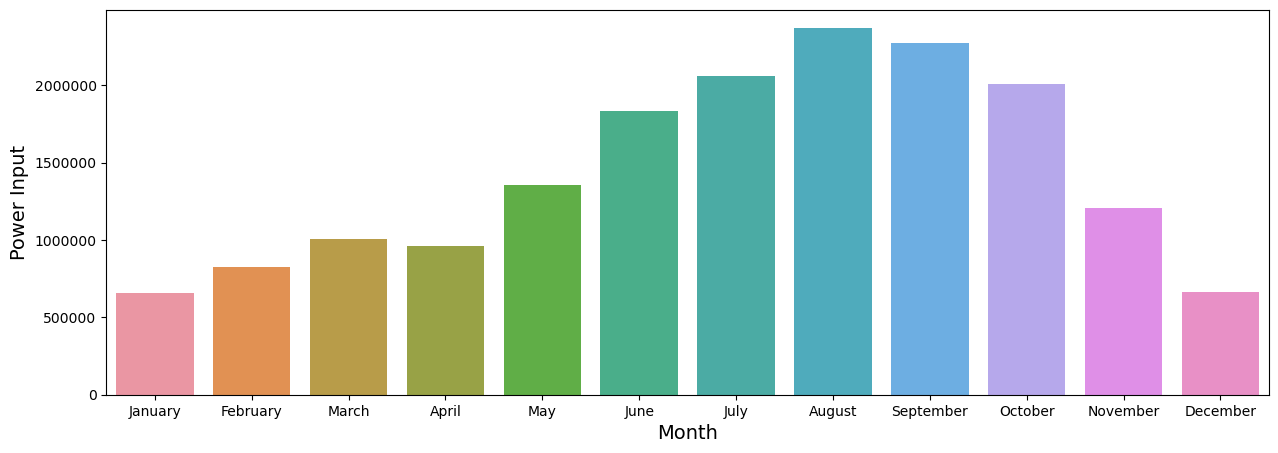

In [57]:
# checking for month column

plt.figure(figsize=[15,5])
monthly_sum = df.groupby('month')['power_input'].sum().reset_index()
ax = sns.barplot(x='month',
                 y='power_input',
                 data=monthly_sum,
                 order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                 ci=None)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Power Input",fontsize=14)
plt.xticks(rotation=0)
plt.show()

**So basically the above plot shows that the highest energy consumption takes place in the month of August, followed by September and then October and July and the rest.**

**January and December have the least amount of energy consumption, maybe due to the fact the most of the people are on vacations around this time and also the ambient temperature is quite low as compared to the rest of the months.**

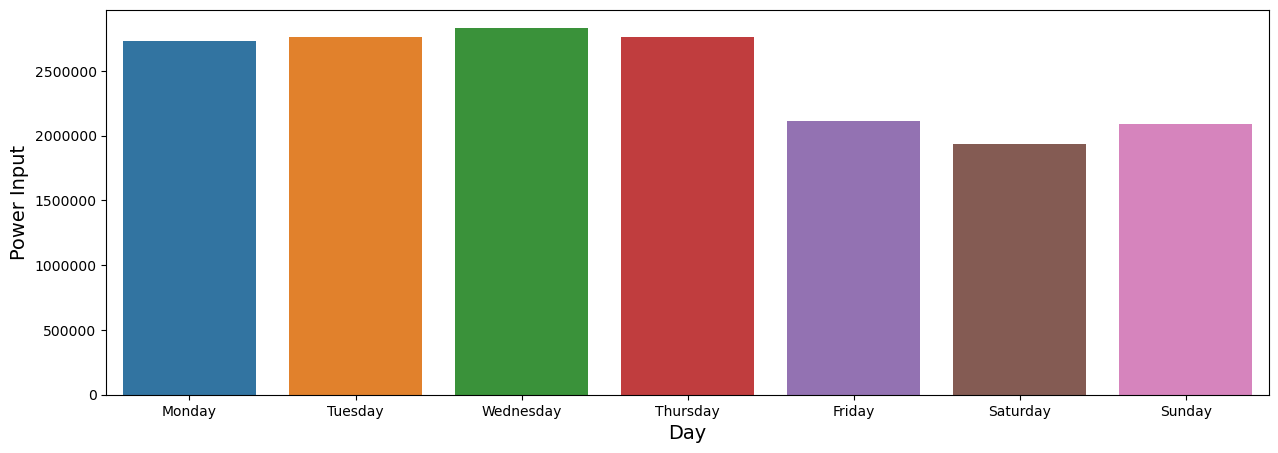

In [61]:
# checking for day column

plt.figure(figsize=[15,5])
daily_sum = df.groupby('day')['power_input'].sum().reset_index()
ax = sns.barplot(x='day',
                 y='power_input',
                 data=daily_sum,
                 order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                 ci=None)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xlabel("Day",fontsize=14)
plt.ylabel("Power Input",fontsize=14)
plt.xticks(rotation=0)
plt.show()

**The highest energy consumptions are on the weekdays as weekends are less occupied in the office.**

**Saturday is the lowest while Friday and Sunday are at the same level due to the reason that in 2021, the weekends were Friday and Saturday while in 2022, the weekends in Dubai were changed to Saturday and Sunday.**

### Checking for outliers again

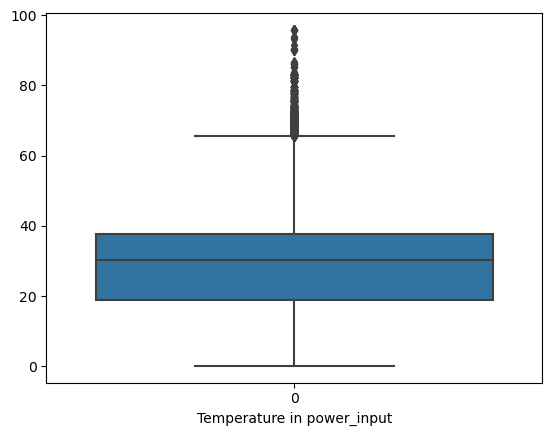

In [248]:
# Checking for outliers in 'power_input' column
sns.boxplot(df.power_input)
plt.xlabel("Temperature in power_input")
plt.show()

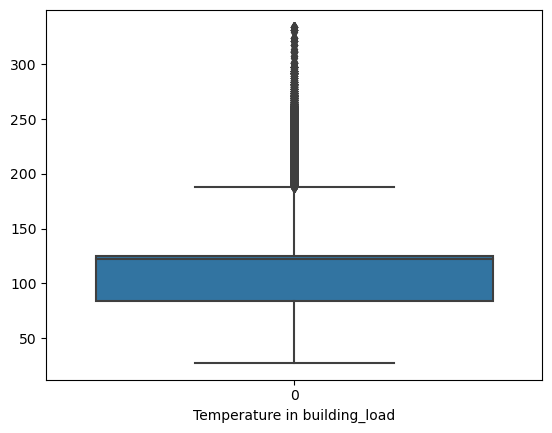

In [249]:
# Checking for outliers in 'building_load' column
sns.boxplot(df.building_load)
plt.xlabel("Temperature in building_load")
plt.show()

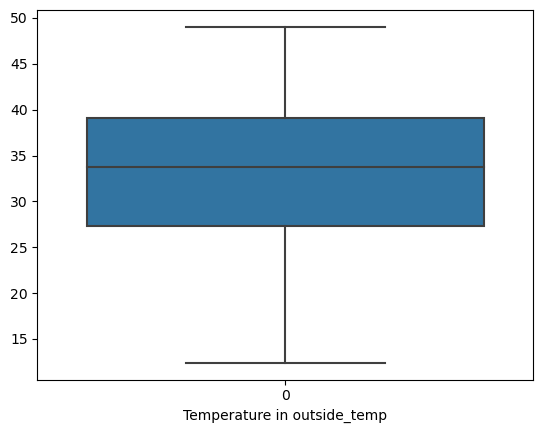

In [250]:
# Checking for outliers in 'outside_temp' column
sns.boxplot(df.outside_temp)
plt.xlabel("Temperature in outside_temp")
plt.show()

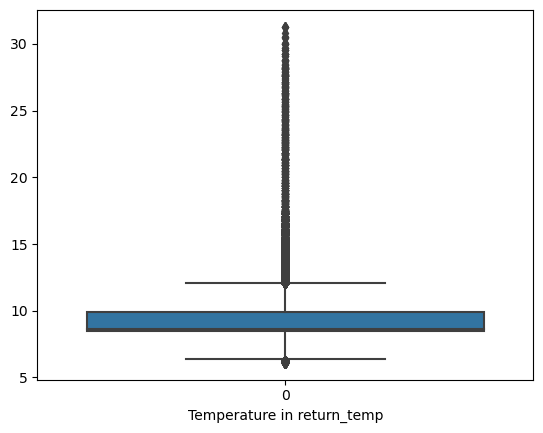

In [251]:
# Checking for outliers in 'return_temp' column
sns.boxplot(df.return_temp)
plt.xlabel("Temperature in return_temp")
plt.show()

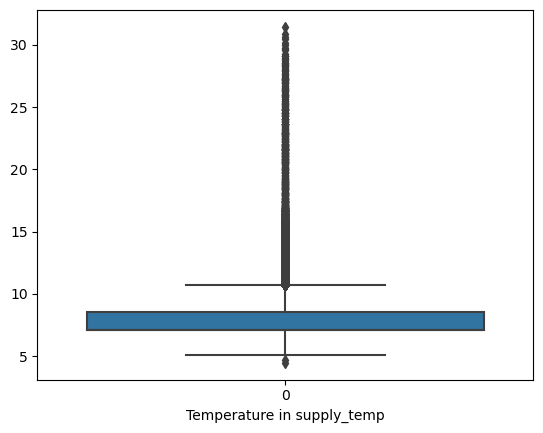

In [252]:
# Checking for outliers in 'supply_temp' column
sns.boxplot(df.supply_temp)
plt.xlabel("Temperature in supply_temp")
plt.show()

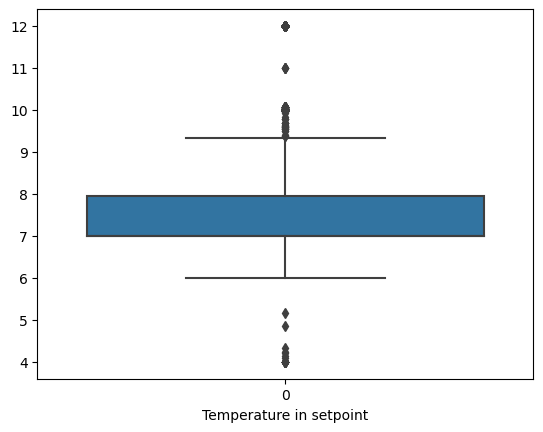

In [253]:
# Checking for outliers in 'setpoint' column
sns.boxplot(df.setpoint)
plt.xlabel("Temperature in setpoint")
plt.show()

## Data Preparation

### Creating dummy variables for categorical variables other than binary variables

In [27]:
# creating dummy variables for 'month'
dummy_month = pd.get_dummies(df.month, drop_first = True)

In [28]:
# creating dummy variables for 'day'
dummy_day = pd.get_dummies(df.day, drop_first = True)

In [29]:
# concatenating all the above dummy variables with the main 'df' dataframe
df = pd.concat([df, dummy_month, dummy_day], axis = 1)

In [30]:
# now, since we have created the dummy variables for the above categorical variables, we don't need the above variables.
# so we will drop them.
df = df.drop(['month', 'day'], axis = 1)

### Train Test Split

In [31]:
# train test split
df_train, df_test = train_test_split(df, train_size=0.5, shuffle=True, random_state=100)

### Feature Scaling

In [32]:
# Instantiating an object 'scaler'
scaler = MinMaxScaler()

# Creating a list of numeric variables whose scaling needs to be done
numerical_vars = ['setpoint', 'outside_temp', 'return_temp', 'supply_temp', 'power_input', 'building_load']

# Fitting on train set
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# Transforming the test set
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

### Create X_train and y_train

In [33]:
y_train = df_train.pop('power_input')
X_train = df_train

### Create X_test and y_test

In [34]:
y_test = df_test.pop('power_input')
X_test = df_test

## Model-1 Simple Linear Regression

### Feature Selection using RFE method

In [278]:
# feature selection using Recursive Feature Elimination (RFE) method.
# We will first use RFE appraoch to select the first 10-most significant predictor variables.

X_train_1 = X_train
y_train_1 = y_train
X_test_1 = X_test
y_test_1 = y_test

lm = LinearRegression()
lm.fit(X_train_1, y_train_1)

rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train_1, y_train_1)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [279]:
# checking for the columns and their ranking as per RFE
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('setpoint', True, 1),
 ('outside_temp', True, 1),
 ('return_temp', True, 1),
 ('supply_temp', True, 1),
 ('building_load', True, 1),
 ('August', True, 1),
 ('December', False, 5),
 ('February', False, 8),
 ('January', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 6),
 ('May', True, 1),
 ('November', True, 1),
 ('October', True, 1),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 7),
 ('Sunday', True, 1),
 ('Thursday', False, 4),
 ('Tuesday', True, 1),
 ('Wednesday', False, 3)]

In [280]:
# checking the columns considered by RFE
col = X_train_1.columns[rfe.support_]
col

Index(['setpoint', 'outside_temp', 'return_temp', 'supply_temp',
       'building_load', 'August', 'January', 'July', 'June', 'May', 'November',
       'October', 'September', 'Sunday', 'Tuesday'],
      dtype='object')

### Creating the model

In [281]:
# Creating new X_train for the columns selected through RFE

X_train_rfe = X_train_1[col]

# Unlike SKLearn, statsmodels library doesn't automatically fit a constant, 
# So we need to use the method sm.add_constant(X) in order to add a constant. 

X_train_01 = sm.add_constant(X_train_rfe)


# creating a model and fit

lr_01 = sm.OLS(y_train, X_train_01)
lr_model_01 = lr_01.fit()


# checking statistical summary

lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            power_input   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                 2.693e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:18:58   Log-Likelihood:             3.2866e+05
No. Observations:              293376   AIC:                        -6.573e+05
Df Residuals:                  293360   BIC:                        -6.571e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0650      0.001     53.113      0.000       0.063       0.067
setpoint         -0.0140      0.002     -8.338      0.000      -0.017      -0.011
outside_temp      0.1488      0.001    106.254      0.000       0.146       0.152
return_temp      -1.0075      0.016    -62.612      0.000      -1.039      -0.976
supply_temp       0.8519      0.016     52.724      0.000       0.820       0.884
building_load     0.5767      0.003    201.781      0.000       0.571       0.582
August            0.0340      0.001     47.599      0.000       0.033       0.035
January          -0.0158      0.001    -24.128      0.000      -0.017      -0.015
July              0.0410      0.001     56.192      0.000       0.040       0.042
June              0.0618      0.001     84.943      0.000       0.060       0.063
May               0.0300      0.001     44.337      0.000       0.029       0.031
November          0.0128      0.001     21.051      0.000       0.012       0.014
October           0.0272      0.001     43.716      0.000       0.026       0.028
September         0.0345      0.001     49.610      0.000       0.033       0.036
Sunday            0.0093      0.000     20.168      0.000       0.008       0.010
Tuesday           0.0042      0.000     10.464      0.000       0.003       0.005
==============================================================================
Omnibus:                    20839.601   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86998.881
Skew:                          -0.240   Prob(JB):                         0.00
Kurtosis:                       5.624   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
# Removing the 'const' column

X_train_new_01 = X_train_01.drop(['const'], axis=1)


# Calculating VIF

vif_01 = pd.DataFrame()
X = X_train_new_01
vif_01['Features'] = X.columns
vif_01['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_01['VIF'] = round(vif_01['VIF'], 2)
vif_01 = vif_01.sort_values(by = 'VIF', ascending = False)
vif_01

Features     VIF
3     supply_temp  176.52
2     return_temp  165.84
0        setpoint   25.75
1    outside_temp   24.28
4   building_load   18.58
5          August    2.59
12      September    2.41
7            July    2.33
8            June    1.90
11        October    1.80
9             May    1.55
10       November    1.37
6         January    1.22
14        Tuesday    1.22
13         Sunday    1.17

### Residual Analysis

- Check for Normal distribution of error terms
- Check for Homoscedasticity of the error terms

#### Assumption-1: Normal distribution of error terms

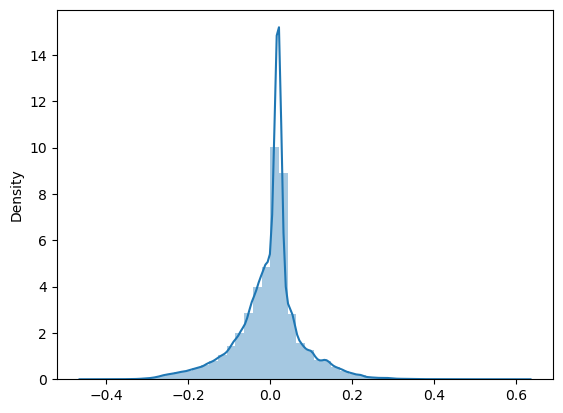

In [283]:
# computing the predicted values of y_train

y_train_pred = lr_model_01.predict(X_train_01)

# computing the residuals

res = y_train_1 - y_train_pred

# plotting distplot to check for the distribution of the residuals

sns.distplot(res)
plt.show()

#### As we see from the above plot, there is a normal distribution of the error terms or the residuals with a mean value of 0. Hence, our first assumption is verified.

#### Assumption-2: Error terms have constant variance (homoscedasticity)

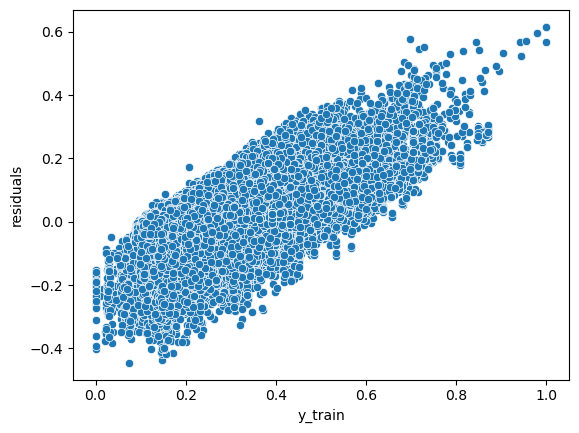

In [284]:
# plotting a scatter plot between residuals and y_train.

sns.scatterplot(x = y_train_1, y = res)
plt.xlabel('y_train')
plt.ylabel('residuals')
plt.show()

### Model Evaluation

In [285]:
# Considering only those variables that were considered in our final model.
# The list of those columns was saved in the variable 'X_train_new_01'

X_test_01 = X_test_1[X_train_new_01.columns]

#### Making predictions

In [286]:
# adding a constant

X_test_01 = sm.add_constant(X_test_01)

In [287]:
# predict y_test

y_test_pred = lr_model_01.predict(X_test_01)

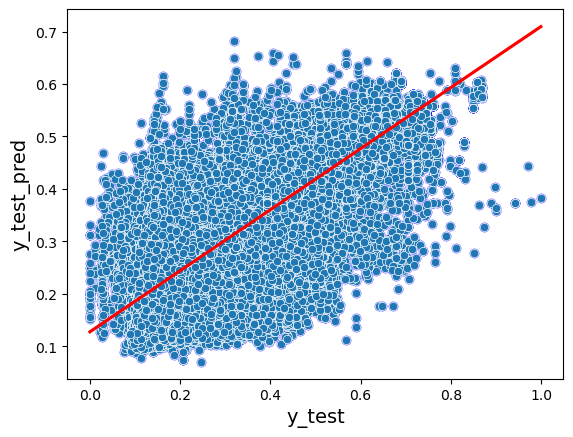

In [288]:
# Checking for predicted values of y_test against the actual values of y_test

sns.regplot(x=y_test_1, y=y_test_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.scatterplot(x=y_test_1, y=y_test_pred)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('y_test_pred',fontsize=14)
plt.show()

#### As we see from the above plot, our model has predicted the values very well for test data as well.

### Evaluation of Model

In [293]:
# calculating the r-squared value for the test set
test_r2 = r2_score(y_true = y_test_1, y_pred = y_test_pred)

# calculating the r-squared value for the train set which anyway was seen in the summary statistics of our final model
train_r2 = r2_score(y_true = y_train_1, y_pred = y_train_pred)

# calculating mae and mse for train set
train_mae = mean_absolute_error(y_true = y_train_1, y_pred = y_train_pred)
train_mse = mean_squared_error(y_true = y_train_1, y_pred = y_train_pred)

# calculating mae and mse for test set
test_mae = mean_absolute_error(y_true = y_test_1, y_pred = y_test_pred)
test_mse = mean_squared_error(y_true = y_test_1, y_pred = y_test_pred)

In [294]:
train_mae, test_mae

(0.054725337574821266, 0.054396219332011525)

In [295]:
train_mse, test_mse

(0.0062298518846034875, 0.006148373370295476)

In [296]:
train_r2, test_r2

(0.579309259215065, 0.5836551846673728)

## Model-2 Regularization

**Lasso Regression (L1 Regularization):**

Lasso stands for "Least Absolute Shrinkage and Selection Operator."
It adds a penalty term to the linear regression cost function, which is the absolute sum of the coefficients (L1 norm).
Lasso encourages sparsity by driving some of the coefficients to exactly zero. In other words, it can be used for feature selection, automatically selecting a subset of the most important features.
Lasso is effective when you suspect that only a few features are relevant, and you want to eliminate the influence of less important features.

**Ridge Regression (L2 Regularization):**

Ridge adds a penalty term to the linear regression cost function, which is the sum of the squares of the coefficients (L2 norm).
Ridge does not force coefficients to become exactly zero. Instead, it shrinks the coefficients toward zero, making them small but not entirely eliminating them.
Ridge is particularly useful when dealing with multicollinearity (high correlation between features), as it tends to distribute the influence of correlated features more evenly among them.
It helps to improve the stability of the model by reducing the sensitivity of the coefficients to small changes in the data.

#### Will use Ridge Regression since it will not completely eliminate the variables but move them towards 0

In [297]:
X_train_2 = X_train
y_train_2 = y_train
X_test_2 = X_test
y_test_2 = y_test

In [298]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 6
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_2, y_train_2) 

Fitting 6 folds for each of 30 candidates, totalling 180 fits


GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [235]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [299]:
# Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_2, y_train_2)
print(ridge.coef_)

[-1.58438409e-02  1.46334317e-01 -7.03039961e-01  5.54005858e-01
  5.29042068e-01  3.78143630e-02 -5.75959622e-03 -3.31063780e-05
 -1.71508449e-02  4.53930474e-02  6.46804151e-02  4.38838668e-03
  3.25552956e-02  1.32134850e-02  3.11419342e-02  3.81494680e-02
  1.10697395e-02  3.55794065e-03  1.72476885e-02  1.00254056e-02
  1.14594514e-02  1.03008169e-02]


In [300]:
# Lets calculate some metrics such as R2 score, MSE & MAE

y_pred_train_lr = ridge.predict(X_train_2)
y_pred_test_lr = ridge.predict(X_test_2)

r2_train_lr = r2_score(y_train_2, y_pred_train_lr)
print(r2_train_lr)

r2_test_lr = r2_score(y_test_2, y_pred_test_lr)
print(r2_test_lr)

mse_train_lr = mean_squared_error(y_train_2, y_pred_train_lr)
print(mse_train_lr)

mse_test_lr = mean_squared_error(y_test_2, y_pred_test_lr)
print(mse_test_lr)

mae_train_lr = mean_absolute_error(y_train_2, y_pred_train_lr)
print(mae_train_lr)

mae_test_lr = mean_absolute_error(y_test_2, y_pred_test_lr)
print(mae_test_lr)

0.5798821024625943
0.5843356255822255
0.006221368863136116
0.006138324956944639
0.054544395568404264
0.05420954242875686


## Model-3 Decision Trees

In [301]:
X_train_3 = X_train
y_train_3 = y_train
X_test_3 = X_test
y_test_3 = y_test

### Use Cross Validation to find the best hyperparameters

In [303]:
# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Adjust the range of values as needed
    'min_samples_split': [2, 5, 10],  # Adjust the range of values as needed
    'min_samples_leaf': [1, 2, 4]  # Adjust the range of values as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [304]:
# Perform the grid search on your data
grid_search.fit(X_train_3, y_train_3)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [305]:
# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [306]:
# Get the best model from the grid search
best_dt_model = grid_search.best_estimator_

# Optionally, evaluate the model using cross-validation scores
cross_val_scores = cross_val_score(best_dt_model, X_train_3, y_train_3, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [-0.00428076 -0.00429103 -0.00428351 -0.00425298 -0.00428735]


### Creating model with best hyperparameters - {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [307]:
# Create and train a Decision Tree regression model
tree_model = DecisionTreeRegressor(max_depth = 15,
                                   min_samples_leaf = 4,
                                   min_samples_split = 10)
tree_model.fit(X_train_3, y_train_3)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=10)

In [308]:
# Make predictions on the test and train set

y_pred_test_tree = tree_model.predict(X_test_3)
y_pred_train_tree = tree_model.predict(X_train_3)

In [309]:
# Lets calculate some metrics such as R2 score, MSE & MAE

r2_train_tree = r2_score(y_train_3, y_pred_train_tree)
print(r2_train_tree)

r2_test_tree = r2_score(y_test_3, y_pred_test_tree)
print(r2_test_tree)

mse_train_tree = mean_squared_error(y_train_3, y_pred_train_tree)
print(mse_train_tree)

mse_test_tree = mean_squared_error(y_test_3, y_pred_test_tree)
print(mse_test_tree)

mae_train_tree = mean_absolute_error(y_train_3, y_pred_train_tree)
print(mae_train_tree)

mae_test_tree = mean_absolute_error(y_test_3, y_pred_test_tree)
print(mae_test_tree)

0.7744988007998919
0.7160666472710606
0.0033393629443708643
0.004192986679713116
0.03341777611464406
0.03716117224757714


## Model-4 Support Vector Machines

In [2]:
# import data
df = pd.read_csv("data.csv")

In [3]:
# remove 'time' column
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [4]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [5]:
# train test split
df_train, df_test = train_test_split(df, train_size=0.5, shuffle=True, random_state=100)

In [6]:
# Instantiating an object 'scaler'
scaler = MinMaxScaler()

# Creating a list of numeric variables whose scaling needs to be done
numerical_vars = ['outside_temp', 'return_temp', 'power_input', 'building_load']

# Fitting on train set
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# Transforming the test set
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [7]:
y_train_4 = df_train.pop('power_input')
X_train_4 = df_train

In [8]:
y_test_4 = df_test.pop('power_input')
X_test_4 = df_test

### kernel='rbf', C=1.0, epsilon=0.1

In [9]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Adjust kernel, C, and epsilon as needed
svr_model.fit(X_train_4, y_train_4)

SVR()

In [10]:
# Make predictions on the test and train set

y_pred_test_svr = svr_model.predict(X_test_4)
y_pred_train_svr = svr_model.predict(X_train_4)

In [11]:
# Lets calculate some metrics such as R2 score, MSE & MAE

r2_train_svr = r2_score(y_train_4, y_pred_train_svr)
print(r2_train_svr)

r2_test_svr = r2_score(y_test_4, y_pred_test_svr)
print(r2_test_svr)

mse_train_svr = mean_squared_error(y_train_4, y_pred_train_svr)
print(mse_train_svr)

mse_test_svr = mean_squared_error(y_test_4, y_pred_test_svr)
print(mse_test_svr)

mae_train_svr = mean_absolute_error(y_train_4, y_pred_train_svr)
print(mae_train_svr)

mae_test_svr = mean_absolute_error(y_test_4, y_pred_test_svr)
print(mae_test_svr)

0.5264285866281706
0.530098402294483
0.0070129419929331575
0.0069392733224832095
0.06823797491772415
0.06801568551617991


### kernel='linear', C=1.0, epsilon=0.2

In [352]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)  # Adjust kernel, C, and epsilon as needed
svr_model.fit(X_train_4, y_train_4)

SVR(epsilon=0.2, kernel='linear')

In [353]:
# Make predictions on the test and train set

y_pred_test_svr = svr_model.predict(X_test_4)
y_pred_train_svr = svr_model.predict(X_train_4)

In [354]:
# Lets calculate some metrics such as R2 score, MSE & MAE

r2_train_svr = r2_score(y_train_4, y_pred_train_svr)
print(r2_train_svr)

r2_test_svr = r2_score(y_test_4, y_pred_test_svr)
print(r2_test_svr)

mse_train_svr = mean_squared_error(y_train_4, y_pred_train_svr)
print(mse_train_svr)

mse_test_svr = mean_squared_error(y_test_4, y_pred_test_svr)
print(mse_test_svr)

mae_train_svr = mean_absolute_error(y_train_4, y_pred_train_svr)
print(mae_train_svr)

mae_test_svr = mean_absolute_error(y_test_4, y_pred_test_svr)
print(mae_test_svr)

0.40219178126706967
0.40392069215677606
0.008852718391557636
0.00880260305391206
0.08019296590408716
0.08005464564697912


## Model-5 Random Forests

In [2]:
# import data
df = pd.read_csv("data.csv")

In [3]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [4]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [5]:
# train test split
df_train, df_test = train_test_split(df, train_size=0.5, shuffle=True, random_state=100)

In [6]:
# Instantiating an object 'scaler'
scaler = MinMaxScaler()

# Creating a list of numeric variables whose scaling needs to be done
numerical_vars = ['outside_temp', 'return_temp', 'power_input', 'building_load']

# Fitting on train set
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# Transforming the test set
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [7]:
y_train_5 = df_train.pop('power_input')
X_train_5 = df_train

In [8]:
y_test_5 = df_test.pop('power_input')
X_test_5 = df_test

#### finding optimal hyperparameters

In [9]:
# Create a random forest regressor
rf_model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100,150,200,250,300],
    'max_depth': [None, 5, 10, 15],  # Adjust the range of values as needed
    'min_samples_split': [2, 5, 10],  # Adjust the range of values as needed
    'min_samples_leaf': [1, 2, 4]  # Adjust the range of values as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [10]:
# Perform the grid search on your data
grid_search.fit(X_train_5, y_train_5)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [11]:
# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


#### 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [13]:
# Create and train a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=300,
                                 max_depth=None,
                                 min_samples_leaf=1,
                                 min_samples_split=10,
                                 random_state=42)
rf_model.fit(X_train_5, y_train_5)

RandomForestRegressor(min_samples_split=10, n_estimators=300, random_state=42)

In [14]:
# Make predictions on the test and train set

y_pred_test_rf = rf_model.predict(X_test_5)
y_pred_train_rf = rf_model.predict(X_train_5)

In [15]:
# Lets calculate some metrics such as R2 score, MSE & MAE

r2_train_rf = r2_score(y_train_5, y_pred_train_rf)
print(r2_train_rf)

r2_test_rf = r2_score(y_test_5, y_pred_test_rf)
print(r2_test_rf)

mse_train_rf = mean_squared_error(y_train_5, y_pred_train_rf)
print(mse_train_rf)

mse_test_rf = mean_squared_error(y_test_5, y_pred_test_rf)
print(mse_test_rf)

mae_train_rf = mean_absolute_error(y_train_5, y_pred_train_rf)
print(mae_train_rf)

mae_test_rf = mean_absolute_error(y_test_5, y_pred_test_rf)
print(mae_test_rf)

0.8548703087056463
0.7466823926394572
0.002149171334589138
0.0037408685636645
0.025719244371414426
0.03356758140076448


#### Hence the best model we get is with the hyperparameters 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

## Model-6 Gradient Boosting

In [17]:
# import data
df = pd.read_csv("data.csv")

In [18]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [19]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [20]:
# train test split
df_train, df_test = train_test_split(df, train_size=0.5, shuffle=True, random_state=100)

In [21]:
# Instantiating an object 'scaler'
scaler = MinMaxScaler()

# Creating a list of numeric variables whose scaling needs to be done
numerical_vars = ['outside_temp', 'return_temp', 'power_input', 'building_load']

# Fitting on train set
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# Transforming the test set
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [22]:
y_train_6 = df_train.pop('power_input')
X_train_6 = df_train

In [23]:
y_test_6 = df_test.pop('power_input')
X_test_6 = df_test

#### finding optimal hyperparameters

In [29]:
# Create a gradient boosting regressor
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [30]:
# Perform the grid search on your data
grid_search.fit(X_train_6, y_train_6)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4,
                                           0.5],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='neg_mean_squared_error')

In [31]:
# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 300}


#### n_estimators=300, learning_rate=0.5

In [32]:
# Create and train a Random Forest regression model
model_gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.5, random_state=42)
model_gb.fit(X_train_6, y_train_6)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=300, random_state=42)

In [33]:
# Make predictions on the test and train set

y_pred_test_gb = model_gb.predict(X_test_6)
y_pred_train_gb = model_gb.predict(X_train_6)

In [34]:
# Lets calculate some metrics such as R2 score, MSE & MAE

r2_train_gb = r2_score(y_train_6, y_pred_train_gb)
print(r2_train_gb)

r2_test_gb = r2_score(y_test_6, y_pred_test_gb)
print(r2_test_gb)

mse_train_gb = mean_squared_error(y_train_6, y_pred_train_gb)
print(mse_train_gb)

mse_test_gb = mean_squared_error(y_test_6, y_pred_test_gb)
print(mse_test_gb)

mae_train_gb = mean_absolute_error(y_train_6, y_pred_train_gb)
print(mae_train_gb)

mae_test_gb = mean_absolute_error(y_test_6, y_pred_test_gb)
print(mae_test_gb)

0.6863650502447682
0.6792477716969323
0.004644502703255409
0.004736709540590672
0.04254846575575837
0.042903793005034


#### Hence the best model we get is with the hyperparameters {'learning_rate': 0.5, 'n_estimators': 300}

## Model-7 Neural Networks

In [25]:
pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 4.1 MB/s eta 0:00:00
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 5.5/5.5 MB 22.1 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 19.8 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 3.7/3.7 MB 18.0 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 9.9 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ------------------------------------- 442.0/442.0 kB 28.8 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 8.4 MB/s eta 0:00:00
     --------------------------------

In [161]:
# import data
df = pd.read_csv("data.csv")

In [162]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [163]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [164]:
# train test split
df_train, df_test = train_test_split(df, train_size=0.6, shuffle=True, random_state=100)

In [165]:
# Instantiating an object 'scaler'
scaler = MinMaxScaler()

# Creating a list of numeric variables whose scaling needs to be done
numerical_vars = ['outside_temp', 'return_temp', 'power_input', 'building_load']

# Fitting on train set
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

# Transforming the test set
df_test[numerical_vars] = scaler.transform(df_test[numerical_vars])

In [166]:
y_train_7 = df_train.pop('power_input')
X_train_7 = df_train

In [167]:
y_test_7 = df_test.pop('power_input')
X_test_7 = df_test

In [168]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_7.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [169]:
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              metrics=['mae','mse'])

In [170]:
# Train the model
history = model.fit(X_train_7, y_train_7, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0506 - mae: 0.0506 - mse: 0.0067 - val_loss: 0.0510 - val_mae: 0.0510 - val_mse: 0.0069
Epoch 2/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0491 - mae: 0.0491 - mse: 0.0065 - val_loss: 0.0489 - val_mae: 0.0489 - val_mse: 0.0065
Epoch 3/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0484 - mae: 0.0484 - mse: 0.0063 - val_loss: 0.0485 - val_mae: 0.0485 - val_mse: 0.0065
Epoch 4/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0482 - mae: 0.0482 - mse: 0.0063 - val_loss: 0.0480 - val_mae: 0.0480 - val_mse: 0.0064
Epoch 5/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0479 - mae: 0.0479 - mse: 0.0062 - val_loss: 0.0493 - val_mae: 0.0493 - val_mse: 0.0063
Epoch 6/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0475 - mae: 0.0475 - mse: 0.0062 - val_loss: 0.0480 - val_mae: 0.0480 - val_mse: 0.006

Epoch 50/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0458 - mae: 0.0458 - mse: 0.0059 - val_loss: 0.0461 - val_mae: 0.0461 - val_mse: 0.0061


In [171]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                256       
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
y_preds = model.predict(X_test_7)
y_preds

7335/7335 [==============================] - 6s 814us/step


array([[0.28785163],
       [0.39173287],
       [0.26081258],
       ...,
       [0.22461398],
       [0.2610338 ],
       [0.39173287]], dtype=float32)

In [173]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test_7, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.04537162>

In [174]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test_7,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.005823235>

In [175]:
y_test_7 = tf.constant(y_test_7, dtype=tf.float32)
y_preds = tf.constant(y_preds, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_7 = tf.reshape(y_test_7, (-1, 1))
y_preds = tf.reshape(y_preds, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_7, y_preds)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.6057348251342773


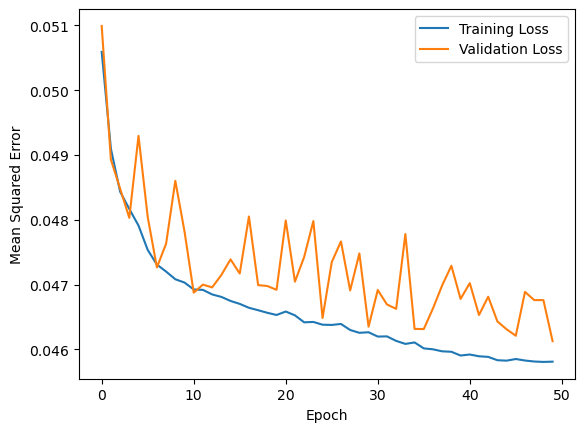

In [176]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Improving the model - adding more number of neurons

In [177]:
model_1 = Sequential()
model_1.add(Dense(100, activation='relu', input_shape=(X_train_7.shape[1],)))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(1))

In [178]:
# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              metrics=['mae','mse'])

In [179]:
# fit the model
history_1 = model_1.fit(X_train_7, y_train_7, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 15s 1ms/step - loss: 0.0505 - mae: 0.0505 - mse: 0.0066 - val_loss: 0.0503 - val_mae: 0.0503 - val_mse: 0.0067
Epoch 2/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0483 - mae: 0.0483 - mse: 0.0062 - val_loss: 0.0477 - val_mae: 0.0477 - val_mse: 0.0062
Epoch 3/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0474 - mae: 0.0474 - mse: 0.0061 - val_loss: 0.0478 - val_mae: 0.0478 - val_mse: 0.0064
Epoch 4/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0469 - mae: 0.0469 - mse: 0.0060 - val_loss: 0.0474 - val_mae: 0.0474 - val_mse: 0.0062
Epoch 5/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0466 - mae: 0.0466 - mse: 0.0060 - val_loss: 0.0472 - val_mae: 0.0472 - val_mse: 0.0063
Epoch 6/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0464 - mae: 0.0464 - mse: 0.0060 - val_loss: 0.0469 - val_mae: 0.0469 - val_mse: 0.006

Epoch 50/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0446 - mae: 0.0446 - mse: 0.0057 - val_loss: 0.0452 - val_mae: 0.0452 - val_mse: 0.0058


In [180]:
model_1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 100)               400       
                                                                 
 dense_46 (Dense)            (None, 100)               10100     
                                                                 
 dense_47 (Dense)            (None, 100)               10100     
                                                                 
 dense_48 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20701 (80.86 KB)
Trainable params: 20701 (80.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
# making predictions

y_preds_1 = model_1.predict(X_test_7)
y_preds_1

7335/7335 [==============================] - 7s 886us/step


array([[0.2855417 ],
       [0.39066473],
       [0.24422671],
       ...,
       [0.21403068],
       [0.245093  ],
       [0.39066476]], dtype=float32)

In [301]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test_7,
                                     y_pred = y_preds_1)
mae

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([0.00865269, 0.00137702, 0.02178705, ..., 0.04200324, 0.01873945,
       0.00137699], dtype=float32)>

In [302]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test_7,
                                    y_pred=y_preds_1)
mse

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([7.4868993e-05, 1.8961739e-06, 4.7467544e-04, ..., 1.7642726e-03,
       3.5116688e-04, 1.8960918e-06], dtype=float32)>

In [303]:
mse_value = np.mean(mse.numpy())
mae_value = np.mean(mae.numpy())
mse_value, mae_value

(0.0056436216, 0.044578586)

In [184]:
y_test_7 = tf.constant(y_test_7, dtype=tf.float32)
y_preds_1 = tf.constant(y_preds_1, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_7 = tf.reshape(y_test_7, (-1, 1))
y_preds_1 = tf.reshape(y_preds_1, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_7, y_preds_1)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.6178954839706421


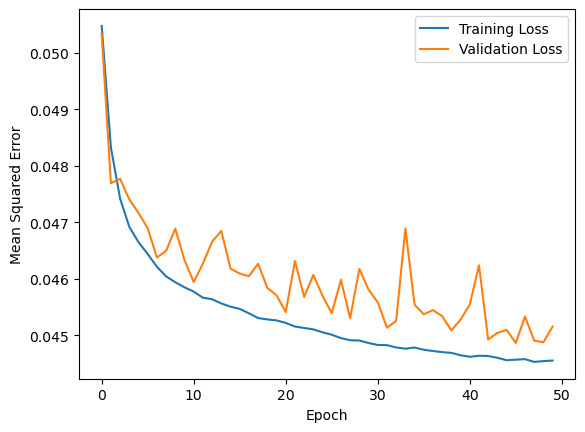

In [185]:
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Improving the model further - adding batch normalization and dropouts

In [186]:
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape=(X_train_7.shape[1],)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))
model_2.add(Dense(100, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))
model_2.add(Dense(100, activation='linear'))
model_2.add(Dense(1))

In [187]:
# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              metrics=['mae','mse'])

In [188]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# fit the model
history_2 = model_2.fit(X_train_7, y_train_7, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
9902/9902 [==============================] - 19s 2ms/step - loss: 0.0709 - mae: 0.0709 - mse: 0.0128 - val_loss: 0.0500 - val_mae: 0.0500 - val_mse: 0.0065
Epoch 2/100
9902/9902 [==============================] - 18s 2ms/step - loss: 0.0564 - mae: 0.0564 - mse: 0.0070 - val_loss: 0.0504 - val_mae: 0.0504 - val_mse: 0.0064
Epoch 3/100
9902/9902 [==============================] - 18s 2ms/step - loss: 0.0558 - mae: 0.0558 - mse: 0.0069 - val_loss: 0.0498 - val_mae: 0.0498 - val_mse: 0.0063
Epoch 4/100
9902/9902 [==============================] - 19s 2ms/step - loss: 0.0554 - mae: 0.0554 - mse: 0.0068 - val_loss: 0.0494 - val_mae: 0.0494 - val_mse: 0.0065
Epoch 5/100
9902/9902 [==============================] - 18s 2ms/step - loss: 0.0550 - mae: 0.0550 - mse: 0.0068 - val_loss: 0.0511 - val_mae: 0.0511 - val_mse: 0.0063
Epoch 6/100
9902/9902 [==============================] - 19s 2ms/step - loss: 0.0549 - mae: 0.0549 - mse: 0.0068 - val_loss: 0.0493 - val_mae: 0.0493 - val_mse:

In [189]:
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 100)               400       
                                                                 
 batch_normalization_7 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_8 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 100)             

In [190]:
# making predictions

y_preds_2 = model_2.predict(X_test_7)
y_preds_2

7335/7335 [==============================] - 7s 962us/step


array([[0.27155733],
       [0.39323545],
       [0.25906447],
       ...,
       [0.20541432],
       [0.27512917],
       [0.39323545]], dtype=float32)

In [304]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test_7,
                                     y_pred = y_preds_2)
mae

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([0.02263707, 0.0011937 , 0.0366248 , ..., 0.0506196 , 0.04877561,
       0.0011937 ], dtype=float32)>

In [305]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test_7,
                                    y_pred=y_preds_2)
mse

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([5.1243691e-04, 1.4249250e-06, 1.3413762e-03, ..., 2.5623441e-03,
       2.3790605e-03, 1.4249250e-06], dtype=float32)>

In [306]:
mse_value = np.mean(mse.numpy())
mae_value = np.mean(mae.numpy())
mse_value, mae_value

(0.006121911, 0.04782822)

In [193]:
y_test_7 = tf.constant(y_test_7, dtype=tf.float32)
y_preds_2 = tf.constant(y_preds_2, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_7 = tf.reshape(y_test_7, (-1, 1))
y_preds_2 = tf.reshape(y_preds_2, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_7, y_preds_2)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.5855127573013306


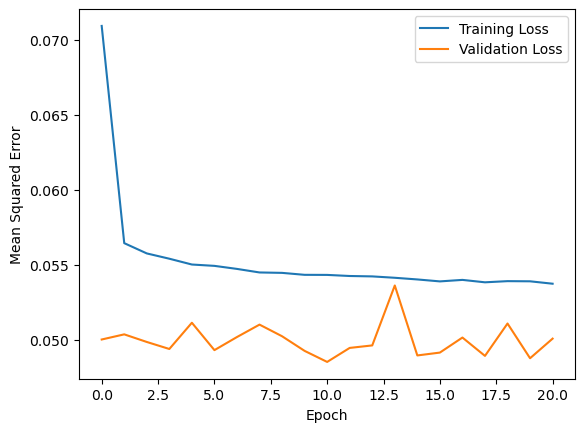

In [194]:
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Improving the model - adding one more layer to the architecture

In [195]:
model_3 = Sequential()
model_3.add(Dense(100, activation='relu', input_shape=(X_train_7.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))
model_3.add(Dense(100, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))
model_3.add(Dense(100, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.2))
model_3.add(Dense(100, activation='linear'))
model_3.add(Dense(1))

In [196]:
# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              metrics=['mae','mse'])

In [197]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# fit the model
history_3 = model_3.fit(X_train_7, y_train_7, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
9902/9902 [==============================] - 23s 2ms/step - loss: 0.0705 - mae: 0.0705 - mse: 0.0130 - val_loss: 0.0504 - val_mae: 0.0504 - val_mse: 0.0067
Epoch 2/100
9902/9902 [==============================] - 21s 2ms/step - loss: 0.0555 - mae: 0.0555 - mse: 0.0069 - val_loss: 0.0496 - val_mae: 0.0496 - val_mse: 0.0061
Epoch 3/100
9902/9902 [==============================] - 21s 2ms/step - loss: 0.0545 - mae: 0.0545 - mse: 0.0068 - val_loss: 0.0504 - val_mae: 0.0504 - val_mse: 0.0063
Epoch 4/100
9902/9902 [==============================] - 21s 2ms/step - loss: 0.0540 - mae: 0.0540 - mse: 0.0067 - val_loss: 0.0482 - val_mae: 0.0482 - val_mse: 0.0066
Epoch 5/100
9902/9902 [==============================] - 21s 2ms/step - loss: 0.0538 - mae: 0.0538 - mse: 0.0067 - val_loss: 0.0509 - val_mae: 0.0509 - val_mse: 0.0064
Epoch 6/100
9902/9902 [==============================] - 21s 2ms/step - loss: 0.0535 - mae: 0.0535 - mse: 0.0066 - val_loss: 0.0489 - val_mae: 0.0489 - val_mse:

In [198]:
model_3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 100)               400       
                                                                 
 batch_normalization_9 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_10 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 100)             

In [199]:
# making predictions

y_preds_3 = model_3.predict(X_test_7)
y_preds_3

7335/7335 [==============================] - 8s 1ms/step


array([[0.28625393],
       [0.39403456],
       [0.26187798],
       ...,
       [0.20772639],
       [0.2721581 ],
       [0.39403456]], dtype=float32)

In [307]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test_7,
                                     y_pred = y_preds_3)
mae

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([0.00794047, 0.00199282, 0.03943832, ..., 0.04830754, 0.04580453,
       0.00199282], dtype=float32)>

In [308]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test_7,
                                    y_pred=y_preds_3)
mse

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([6.3051084e-05, 3.9713382e-06, 1.5553812e-03, ..., 2.3336182e-03,
       2.0980551e-03, 3.9713382e-06], dtype=float32)>

In [309]:
mse_value = np.mean(mse.numpy())
mae_value = np.mean(mae.numpy())
mse_value, mae_value

(0.0059241056, 0.04706686)

In [202]:
y_test_7 = tf.constant(y_test_7, dtype=tf.float32)
y_preds_3 = tf.constant(y_preds_3, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_7 = tf.reshape(y_test_7, (-1, 1))
y_preds_3 = tf.reshape(y_preds_3, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_7, y_preds_3)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.5989053845405579


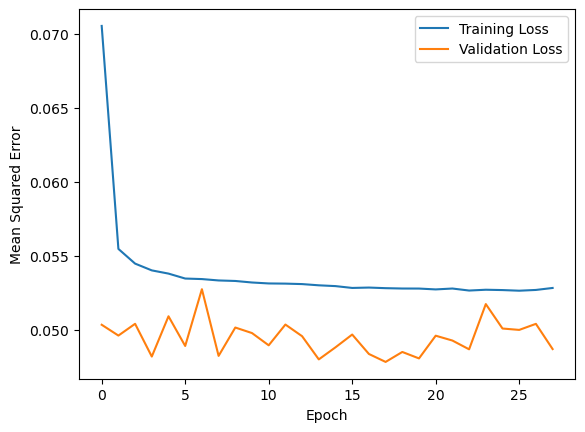

In [203]:
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## Model-8 LSTM

In [279]:
# import data
df = pd.read_csv("data.csv")

In [280]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [281]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [282]:
# Select features and target variable
features = ['outside_temp', 'return_temp', 'building_load']
target = 'power_input'

In [283]:
# Extract features and target variable
X = df[features].values
y = df[target].values

In [284]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [285]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [286]:
# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [287]:
# Build the multivariate LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss=['mse','mae'])

In [288]:
# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 74s 7ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 2/50
9902/9902 [==============================] - 69s 7ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 3/50
9902/9902 [==============================] - 67s 7ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 4/50
9902/9902 [==============================] - 70s 7ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 5/50
9902/9902 [==============================] - 69s 7ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 6/50
9902/9902 [==============================] - 69s 7ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 7/50
9902/9902 [==============================] - 69s 7ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 8/50
9902/9902 [==============================] - 68s 7ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 9/50
9902/9902 [==============================] - 68s 7ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 10/50
9902/9902 [==============================] - 70s 7ms/step - l

KeyboardInterrupt: 

7335/7335 [==============================] - 7s 892us/step


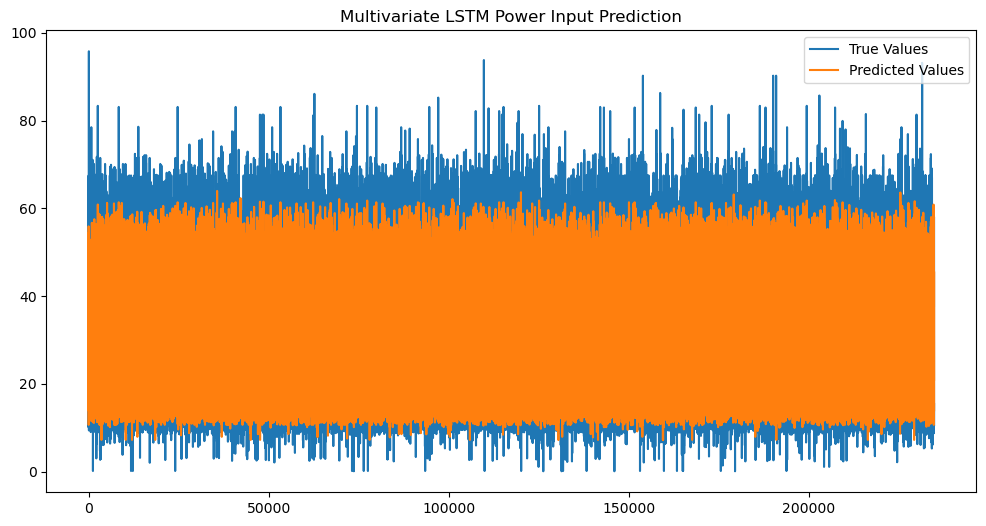

In [139]:
# Evaluate the model on the test set
y_pred_scaled = model.predict(X_test_reshaped)

# Invert the scaling for evaluation
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Multivariate LSTM Power Input Prediction')
plt.legend()
plt.show()

In [310]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test_scaled,
                                     y_pred = y_pred_scaled)
mae

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([0.0609135 , 0.01942177, 0.05501962, ..., 0.00137702, 0.00162929,
       0.0273719 ], dtype=float32)>

In [311]:
# Calcuate the MSE
mse = tf.metrics.mean_squared_error(y_true = y_test_scaled,
                                     y_pred = y_pred_scaled)
mse

<tf.Tensor: shape=(234702,), dtype=float32, numpy=
array([3.7104548e-03, 3.7720520e-04, 3.0271583e-03, ..., 1.8961739e-06,
       2.6545956e-06, 7.4922084e-04], dtype=float32)>

In [312]:
mse_value = np.mean(mse.numpy())

In [313]:
mae_value = np.mean(mae.numpy())

In [314]:
mse_value, mae_value

(0.005645731, 0.04454237)

In [146]:
y_test_scaled = tf.constant(y_test_scaled, dtype=tf.float32)
y_pred_scaled = tf.constant(y_pred_scaled, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_7 = tf.reshape(y_test_7, (-1, 1))
y_pred_scaled = tf.reshape(y_pred_scaled, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_scaled, y_pred_scaled)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.6117323637008667


#### Improving the model - adding layers

In [156]:
# Build the multivariate LSTM model
model_1 = Sequential()
model_1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, len(features))))
model_1.add(LSTM(50, activation='relu', return_sequences=True))
model_1.add(LSTM(50, activation='relu'))
model_1.add(Dense(1))

In [158]:
# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              metrics=['mae','mse'])

In [159]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# fit the model
history_1 = model_1.fit(X_train_reshaped,
                        y_train_scaled,epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
9902/9902 [==============================] - 25s 2ms/step - loss: 0.0523 - mae: 0.0523 - mse: 0.0072 - val_loss: 0.0494 - val_mae: 0.0494 - val_mse: 0.0068
Epoch 2/100
9902/9902 [==============================] - 22s 2ms/step - loss: 0.0500 - mae: 0.0500 - mse: 0.0067 - val_loss: 0.0506 - val_mae: 0.0506 - val_mse: 0.0069
Epoch 3/100
9902/9902 [==============================] - 22s 2ms/step - loss: 0.0497 - mae: 0.0497 - mse: 0.0066 - val_loss: 0.0516 - val_mae: 0.0516 - val_mse: 0.0068
Epoch 4/100
9902/9902 [==============================] - 25s 2ms/step - loss: 0.0495 - mae: 0.0495 - mse: 0.0065 - val_loss: 0.0489 - val_mae: 0.0489 - val_mse: 0.0066
Epoch 5/100
9902/9902 [==============================] - 23s 2ms/step - loss: 0.0493 - mae: 0.0493 - mse: 0.0065 - val_loss: 0.0495 - val_mae: 0.0495 - val_mse: 0.0066
Epoch 6/100
9902/9902 [==============================] - 22s 2ms/step - loss: 0.0490 - mae: 0.0490 - mse: 0.0064 - val_loss: 0.0484 - val_mae: 0.0484 - val_mse:

9902/9902 [==============================] - 22s 2ms/step - loss: 0.0457 - mae: 0.0457 - mse: 0.0059 - val_loss: 0.0458 - val_mae: 0.0458 - val_mse: 0.0058
Epoch 50/100
9902/9902 [==============================] - 22s 2ms/step - loss: 0.0456 - mae: 0.0456 - mse: 0.0058 - val_loss: 0.0463 - val_mae: 0.0463 - val_mse: 0.0060
Epoch 51/100
9902/9902 [==============================] - 22s 2ms/step - loss: 0.0456 - mae: 0.0456 - mse: 0.0058 - val_loss: 0.0457 - val_mae: 0.0457 - val_mse: 0.0059
Epoch 52/100
9902/9902 [==============================] - 23s 2ms/step - loss: 0.0456 - mae: 0.0456 - mse: 0.0058 - val_loss: 0.0456 - val_mae: 0.0456 - val_mse: 0.0059
Epoch 53/100
9902/9902 [==============================] - 27s 3ms/step - loss: 0.0455 - mae: 0.0455 - mse: 0.0058 - val_loss: 0.0463 - val_mae: 0.0463 - val_mse: 0.0059
Epoch 54/100
9902/9902 [==============================] - 24s 2ms/step - loss: 0.0455 - mae: 0.0455 - mse: 0.0058 - val_loss: 0.0455 - val_mae: 0.0455 - val_mse: 0.0060

9902/9902 [==============================] - 22s 2ms/step - loss: 0.0443 - mae: 0.0443 - mse: 0.0056 - val_loss: 0.0446 - val_mae: 0.0446 - val_mse: 0.0056
Epoch 98/100
9902/9902 [==============================] - 22s 2ms/step - loss: 0.0443 - mae: 0.0443 - mse: 0.0056 - val_loss: 0.0444 - val_mae: 0.0444 - val_mse: 0.0057
Epoch 99/100
9902/9902 [==============================] - 24s 2ms/step - loss: 0.0443 - mae: 0.0443 - mse: 0.0056 - val_loss: 0.0445 - val_mae: 0.0445 - val_mse: 0.0057
Epoch 100/100
9902/9902 [==============================] - 23s 2ms/step - loss: 0.0442 - mae: 0.0442 - mse: 0.0056 - val_loss: 0.0448 - val_mae: 0.0448 - val_mse: 0.0056


In [291]:
# Evaluate the model on the test set
y_pred_scaled = model_1.predict(X_test_scaled)

7335/7335 [==============================] - 28s 4ms/step


In [315]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test_scaled,
                                     y_pred = y_pred_scaled)

# Calcuate the MSE
mse = tf.metrics.mean_squared_error(y_true = y_test_scaled,
                                     y_pred = y_pred_scaled)

In [316]:
mse_value = np.mean(mse.numpy())
mae_value = np.mean(mae.numpy())
mse_value, mae_value

(0.005645731, 0.04454237)

In [292]:
y_test_scaled = tf.constant(y_test_scaled, dtype=tf.float32)
y_pred_scaled = tf.constant(y_pred_scaled, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_7 = tf.reshape(y_test_7, (-1, 1))
y_pred_scaled = tf.reshape(y_pred_scaled, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_scaled, y_pred_scaled)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.6189490556716919


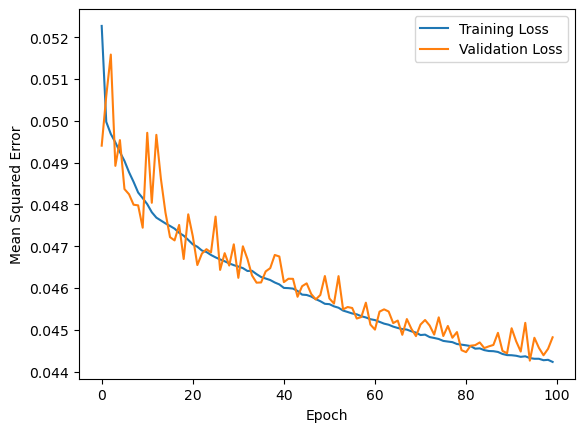

In [160]:
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Hybrid Models

## Model-9 Gradient Boosting with Neural Networks

In [204]:
# import data
df = pd.read_csv("data.csv")

In [205]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [206]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [207]:
# Select features and target variable
features = ['outside_temp', 'return_temp', 'building_load']
target = 'power_input'

In [208]:
# Extract features and target variable
X = df[features].values
y = df[target].values

In [209]:
# Split the data into training and testing sets
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X, y, test_size=0.4, random_state=42)

In [210]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_9_scaled = scaler_X.fit_transform(X_train_9)
X_test_9_scaled = scaler_X.transform(X_test_9)

y_train_9_scaled = scaler_y.fit_transform(y_train_9.reshape(-1, 1))
y_test_9_scaled = scaler_y.transform(y_test_9.reshape(-1, 1))

#### This code trains a XGBoost as a Gradient Boosting model on the original features, uses the predictions from the Gradient Boosting model as features for training a Neural Network, and then evaluates the performance of the hybrid model. 

In [212]:
# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_9_scaled, y_train_9_scaled)

# Use the predictions from the Gradient Boosting model as features for a Neural Network
X_train_gb_features = gb_model.predict(X_train_9_scaled).reshape(-1, 1)
X_test_gb_features = gb_model.predict(X_test_9_scaled).reshape(-1, 1)

# Build the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_gb_features.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(optimizer='adam', loss=['mae','mse'])

# Train the Neural Network using the Gradient Boosting features
nn_model.fit(X_train_gb_features, y_train_9_scaled, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0478 - val_loss: 0.0477
Epoch 2/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0470 - val_loss: 0.0472
Epoch 3/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0470 - val_loss: 0.0464
Epoch 4/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0469 - val_loss: 0.0472
Epoch 5/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0468 - val_loss: 0.0472
Epoch 6/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0467 - val_loss: 0.0467
Epoch 7/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0466 - val_loss: 0.0464
Epoch 8/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0465 - val_loss: 0.0463
Epoch 9/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0465 - val_loss: 0.0462
Epoch 10/50
9902/9902 [==============================] - 11s 1ms/step - l

In [218]:
# Use the trained Gradient Boosting model to generate features for the test set
X_test_gb_features = gb_model.predict(X_test_9_scaled).reshape(-1, 1)

# Make predictions using the Neural Network on the Gradient Boosting features
nn_predictions = nn_model.predict(X_test_gb_features)

# Evaluate the performance of the hybrid model
mse_hybrid = mean_squared_error(y_test_9_scaled, nn_predictions)
print(f'Mean Squared Error for Hybrid Model: {mse_hybrid}')

7335/7335 [==============================] - 6s 829us/step
Mean Squared Error for Hybrid Model: 0.005527702692437839


In [219]:
# Evaluate the performance of the hybrid model
mae_hybrid = mean_absolute_error(y_test_9_scaled, nn_predictions)
print(f'Mean Absolute Error for Hybrid Model: {mae_hybrid}')

Mean Absolute Error for Hybrid Model: 0.04599529321911046


In [293]:
y_test_9_scaled = tf.constant(y_test_9_scaled, dtype=tf.float32)
nn_predictions = tf.constant(nn_predictions, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_9_scaled = tf.reshape(y_test_9_scaled, (-1, 1))
nn_predictions = tf.reshape(nn_predictions, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_9_scaled, nn_predictions)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.6269153356552124


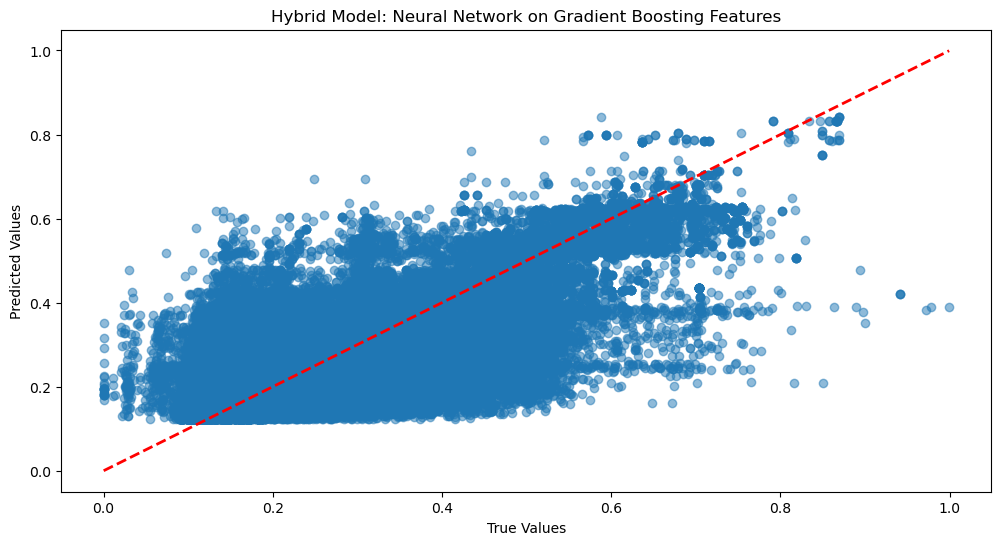

In [220]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test_9_scaled, nn_predictions, alpha=0.5)
plt.plot([min(y_test_9_scaled), max(y_test_9_scaled)], [min(y_test_9_scaled), max(y_test_9_scaled)], linestyle='--', color='red', linewidth=2)
plt.title('Hybrid Model: Neural Network on Gradient Boosting Features')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## Model-10 Autoencoder with Regression Head

#### An autoencoder with a regression head involves using an autoencoder to learn a compressed representation of the input data and then connecting the encoder part to a regression head for predicting the target variable. This code creates an autoencoder with a regression head, where the encoder part of the autoencoder is used to extract features, and a regression model is trained on these features to predict the target variable.

In [229]:
# import data
df = pd.read_csv("data.csv")

In [230]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [231]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [232]:
# Select features and target variable
features = ['outside_temp', 'return_temp', 'building_load']
target = 'power_input'

In [233]:
# Extract features and target variable
X = df[features].values
y = df[target].values

In [234]:
# Split the data into training and testing sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, test_size=0.4, random_state=42)

In [236]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_10_scaled = scaler_X.fit_transform(X_train_10)
X_test_10_scaled = scaler_X.transform(X_test_10)

y_train_10_scaled = scaler_y.fit_transform(y_train_10.reshape(-1, 1))
y_test_10_scaled = scaler_y.transform(y_test_10.reshape(-1, 1))

In [238]:
# Define the Autoencoder model
input_dim = X_train_10_scaled.shape[1]
encoding_dim = 3  # Adjust the encoding dimension as needed

autoencoder = Sequential()
autoencoder.add(Dense(128, activation='relu', input_shape=(input_dim,)))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu', name='encoder'))

autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(input_dim, activation='linear'))

autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(X_train_10_scaled, X_train_10_scaled, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 14s 1ms/step - loss: 2.3043e-04 - val_loss: 1.0862e-06
Epoch 2/50
9902/9902 [==============================] - 13s 1ms/step - loss: 3.8303e-06 - val_loss: 4.9989e-07
Epoch 3/50
9902/9902 [==============================] - 13s 1ms/step - loss: 3.3130e-06 - val_loss: 6.4253e-07
Epoch 4/50
9902/9902 [==============================] - 13s 1ms/step - loss: 2.7877e-06 - val_loss: 3.5636e-06
Epoch 5/50
9902/9902 [==============================] - 13s 1ms/step - loss: 2.5010e-06 - val_loss: 1.1972e-06
Epoch 6/50
9902/9902 [==============================] - 13s 1ms/step - loss: 2.1885e-06 - val_loss: 2.2619e-06
Epoch 7/50
9902/9902 [==============================] - 13s 1ms/step - loss: 1.8955e-06 - val_loss: 4.9131e-07
Epoch 8/50
9902/9902 [==============================] - 13s 1ms/step - loss: 1.8856e-06 - val_loss: 1.7356e-06
Epoch 9/50
9902/9902 [==============================] - 13s 1ms/step - loss: 1.6691e-06 - val_loss: 8.5734e-07
E

NameError: name 'Model' is not defined

In [241]:
# Extract the encoder part for feature extraction
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

# Extract features using the trained Autoencoder
X_train_encoded = encoder.predict(X_train_10_scaled)
X_test_encoded = encoder.predict(X_test_10_scaled)

7335/7335 [==============================] - 6s 799us/step


In [242]:
# Build the Regression Head on top of the encoded features
regression_model = Sequential()
regression_model.add(Dense(64, activation='relu', input_shape=(encoding_dim,)))
regression_model.add(Dense(32, activation='relu'))
regression_model.add(Dense(1, activation='linear'))
regression_model.compile(optimizer='adam', loss=['mse', 'mae'])

# Train the Regression Head
regression_model.fit(X_train_encoded, y_train_10_scaled, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 2/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 3/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 4/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 5/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 6/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 7/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 9/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 10/50
9902/9902 [==============================] - 11s 1ms/step - l

In [245]:
# Make predictions on the test set
regression_predictions = regression_model.predict(X_test_encoded)

# Evaluate the performance of the hybrid model
mse_hybrid = mean_squared_error(y_test_10_scaled, regression_predictions)
print(f'Mean Squared Error for Hybrid Model: {mse_hybrid}')

# Evaluate the performance of the hybrid model
mae_hybrid = mean_absolute_error(y_test_10_scaled, regression_predictions)
print(f'Mean Absolute Error for Hybrid Model: {mae_hybrid}')

7335/7335 [==============================] - 6s 802us/step
Mean Squared Error for Hybrid Model: 0.005385968086976155
Mean Absolute Error for Hybrid Model: 0.046522817702998806


In [294]:
y_test_10_scaled = tf.constant(y_test_10_scaled, dtype=tf.float32)
regression_predictions = tf.constant(regression_predictions, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_10_scaled = tf.reshape(y_test_10_scaled, (-1, 1))
regression_predictions = tf.reshape(regression_predictions, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_10_scaled, regression_predictions)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.636481523513794


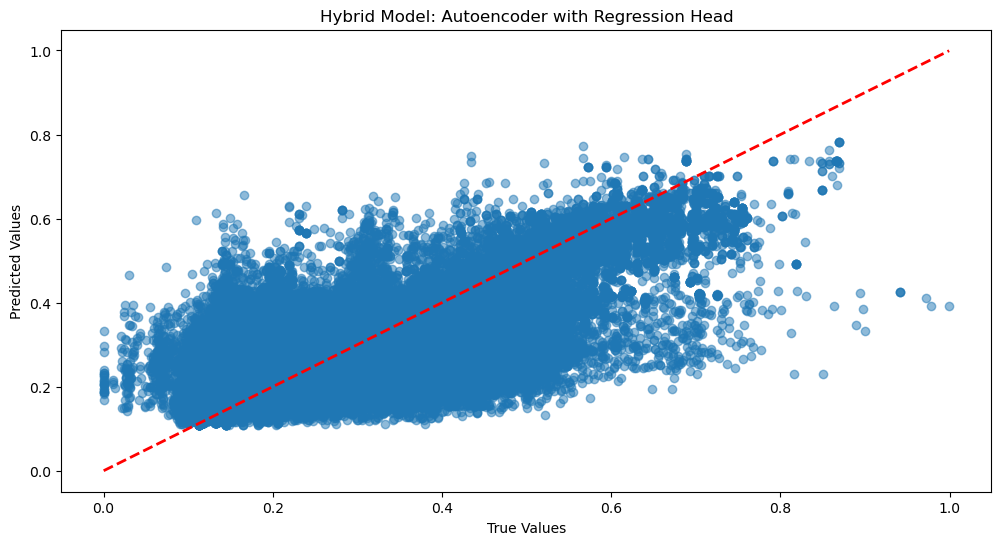

In [244]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test_10_scaled, regression_predictions, alpha=0.5)
plt.plot([min(y_test_10_scaled), max(y_test_10_scaled)], [min(y_test_10_scaled), max(y_test_10_scaled)], linestyle='--', color='red', linewidth=2)
plt.title('Hybrid Model: Autoencoder with Regression Head')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## Model-11 Random Forest with Neural Network Features

In [246]:
# import data
df = pd.read_csv("data.csv")

In [247]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [248]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [249]:
# Select features and target variable
features = ['outside_temp', 'return_temp', 'building_load']
target = 'power_input'

In [250]:
# Extract features and target variable
X = df[features].values
y = df[target].values

In [251]:
# Split the data into training and testing sets
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X, y, test_size=0.4, random_state=42)

In [252]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_11_scaled = scaler_X.fit_transform(X_train_11)
X_test_11_scaled = scaler_X.transform(X_test_11)

y_train_11_scaled = scaler_y.fit_transform(y_train_11.reshape(-1, 1))
y_test_11_scaled = scaler_y.transform(y_test_11.reshape(-1, 1))

In [253]:
# Build and train a Neural Network to extract features
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_11_scaled.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(optimizer='adam', loss=['mse','mae'])

nn_model.fit(X_train_11_scaled, y_train_11_scaled, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 2/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 3/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0059 - val_loss: 0.0061
Epoch 4/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 5/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 6/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 7/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 8/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 9/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 10/50
9902/9902 [==============================] - 11s 1ms/step - l

In [254]:
# Extract features using the trained Neural Network
nn_features_train = nn_model.predict(X_train_11_scaled)
nn_features_test = nn_model.predict(X_test_11_scaled)

# Build and train a Random Forest using Neural Network features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(nn_features_train, y_train_11_scaled)

7335/7335 [==============================] - 6s 815us/step


RandomForestRegressor(random_state=42)

In [255]:
# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(nn_features_test)

# Evaluate the performance of the hybrid model
mse_hybrid = mean_squared_error(y_test_11_scaled, rf_predictions)
print(f'Mean Squared Error for Hybrid Model: {mse_hybrid}')

# Evaluate the performance of the hybrid model
mae_hybrid = mean_absolute_error(y_test_11_scaled, regression_predictions)
print(f'Mean Absolute Error for Hybrid Model: {mae_hybrid}')

Mean Squared Error for Hybrid Model: 0.004792838973153989
Mean Absolute Error for Hybrid Model: 0.046522817702998806


In [295]:
y_test_11_scaled = tf.constant(y_test_11_scaled, dtype=tf.float32)
rf_predictions = tf.constant(rf_predictions, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_11_scaled = tf.reshape(y_test_11_scaled, (-1, 1))
rf_predictions = tf.reshape(rf_predictions, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_11_scaled, rf_predictions)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.6765138506889343


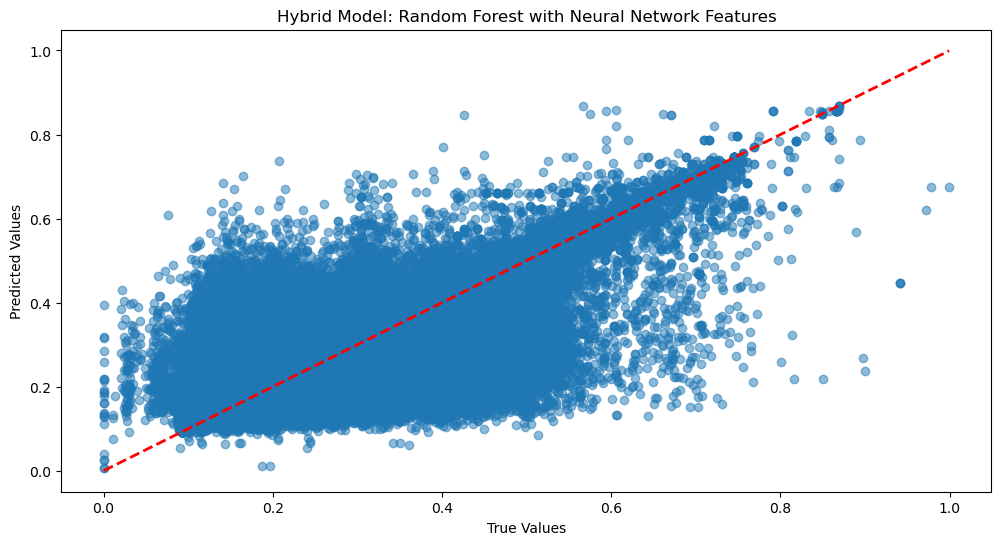

In [256]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test_11_scaled, rf_predictions, alpha=0.5)
plt.plot([min(y_test_11_scaled), max(y_test_11_scaled)], [min(y_test_11_scaled), max(y_test_11_scaled)], linestyle='--', color='red', linewidth=2)
plt.title('Hybrid Model: Random Forest with Neural Network Features')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## Model-12 Ensemble of Neural Networks

In [257]:
# import data
df = pd.read_csv("data.csv")

In [258]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [259]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [260]:
# Select features and target variable
features = ['outside_temp', 'return_temp', 'building_load']
target = 'power_input'

In [261]:
# Extract features and target variable
X = df[features].values
y = df[target].values

In [262]:
# Split the data into training and testing sets
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X, y, test_size=0.4, random_state=42)

In [263]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_12_scaled = scaler_X.fit_transform(X_train_12)
X_test_12_scaled = scaler_X.transform(X_test_12)

y_train_12_scaled = scaler_y.fit_transform(y_train_12.reshape(-1, 1))
y_test_12_scaled = scaler_y.transform(y_test_12.reshape(-1, 1))

In [264]:
# Build and train multiple Neural Networks
num_models = 3
models = []

for _ in range(num_models):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_12_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    
    model.fit(X_train_12_scaled, y_train_12_scaled, epochs=50, batch_size=32, validation_split=0.1)
    models.append(model)

Epoch 1/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 2/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 3/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 4/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 5/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 6/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 7/50
9902/9902 [==============================] - 15s 1ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 8/50
9902/9902 [==============================] - 14s 1ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 9/50
9902/9902 [==============================] - 14s 1ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 10/50
9902/9902 [==============================] - 11s 1ms/step - l

Epoch 30/50
9902/9902 [==============================] - 13s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 31/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 32/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 33/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 34/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 35/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 36/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 37/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 38/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 39/50
9902/9902 [==============================] - 12s 1ms

In [265]:
# Make predictions using individual models
predictions = np.array([model.predict(X_test_12_scaled) for model in models])

# Average predictions from individual models
ensemble_predictions = np.mean(predictions, axis=0)

# Evaluate the performance of the ensemble model
mse_ensemble = mean_squared_error(y_test_12_scaled, ensemble_predictions)
print(f'Mean Squared Error for Ensemble Model: {mse_ensemble}')

# Evaluate the performance of the hybrid model
mae_hybrid = mean_absolute_error(y_test_12_scaled, regression_predictions)
print(f'Mean Absolute Error for Hybrid Model: {mae_hybrid}')

7335/7335 [==============================] - 7s 932us/step
Mean Squared Error for Ensemble Model: 0.005382807123083646
Mean Absolute Error for Hybrid Model: 0.046522817702998806


In [296]:
y_test_12_scaled = tf.constant(y_test_12_scaled, dtype=tf.float32)
ensemble_predictions = tf.constant(ensemble_predictions, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_12_scaled = tf.reshape(y_test_12_scaled, (-1, 1))
ensemble_predictions = tf.reshape(ensemble_predictions, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_12_scaled, ensemble_predictions)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.6366949081420898


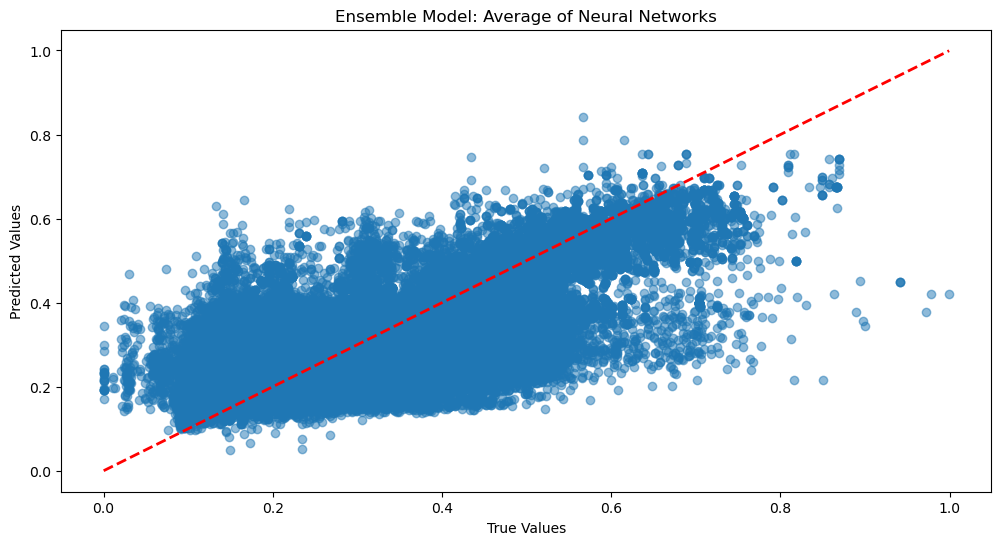

In [266]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test_12_scaled, ensemble_predictions, alpha=0.5)
plt.plot([min(y_test_12_scaled), max(y_test_12_scaled)], [min(y_test_12_scaled), max(y_test_12_scaled)], linestyle='--', color='red', linewidth=2)
plt.title('Ensemble Model: Average of Neural Networks')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## Model-13 Attention Mechanism with Regression

In [267]:
# import data
df = pd.read_csv("data.csv")

In [268]:
# remove 'time', 'supply_temp', 'setpoint' columns
df = df.drop(["time", 'supply_temp', 'setpoint'],axis=1)

In [269]:
# power_input column has some outliers, so creating a new dataframe after removing these outliers
outlier_threshold = 135
df = df[abs(df.power_input) <= outlier_threshold]
df = df[abs(df.power_input) > 0]

# remove the values where building load is 0
df = df[abs(df.building_load) >0]

In [270]:
# Select features and target variable
features = ['outside_temp', 'return_temp', 'building_load']
target = 'power_input'

In [271]:
# Extract features and target variable
X = df[features].values
y = df[target].values

In [272]:
# Split the data into training and testing sets
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X, y, test_size=0.4, random_state=42)

In [273]:
# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_13_scaled = scaler_X.fit_transform(X_train_13)
X_test_13_scaled = scaler_X.transform(X_test_13)

y_train_13_scaled = scaler_y.fit_transform(y_train_13.reshape(-1, 1))
y_test_13_scaled = scaler_y.transform(y_test_13.reshape(-1, 1))

In [276]:
# Define the Attention Mechanism with Regression
input_layer = Input(shape=(X_train_13_scaled.shape[1],))
attention = Attention()([input_layer, input_layer])
attended = Concatenate()([input_layer, attention])
output_layer = Dense(1, activation='linear')(Flatten()(attended))

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_13_scaled, y_train_13_scaled, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0088 - val_loss: 0.0067
Epoch 2/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 3/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 4/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 5/50
9902/9902 [==============================] - 11s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 6/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 7/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 8/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 9/50
9902/9902 [==============================] - 12s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 10/50
9902/9902 [==============================] - 12s 1ms/step - l

In [277]:
# Make predictions on the test set
attention_predictions = model.predict(X_test_13_scaled)

# Evaluate the performance of the model
mse_attention = mean_squared_error(y_test_13_scaled, attention_predictions)
print(f'Mean Squared Error for Attention Model: {mse_attention}')

# Evaluate the performance of the hybrid model
mae_hybrid = mean_absolute_error(y_test_13_scaled, regression_predictions)
print(f'Mean Absolute Error for Hybrid Model: {mae_hybrid}')

7335/7335 [==============================] - 7s 990us/step
Mean Squared Error for Attention Model: 0.006485277511845567
Mean Absolute Error for Hybrid Model: 0.046522817702998806


In [297]:
y_test_13_scaled = tf.constant(y_test_13_scaled, dtype=tf.float32)
attention_predictions = tf.constant(attention_predictions, dtype=tf.float32)

# Reshape y_test and y_preds to make them 2D
y_test_13_scaled = tf.reshape(y_test_13_scaled, (-1, 1))
attention_predictions = tf.reshape(attention_predictions, (-1, 1))

# Initialize the R2Score metric
r2_score = tf.metrics.R2Score()

# Update the metric with true and predicted values
r2_score.update_state(y_test_13_scaled, attention_predictions)

# Get the result
result = r2_score.result()

# Print the R2 score
print(f'R2 Score: {result.numpy()}')

R2 Score: 0.5622850656509399


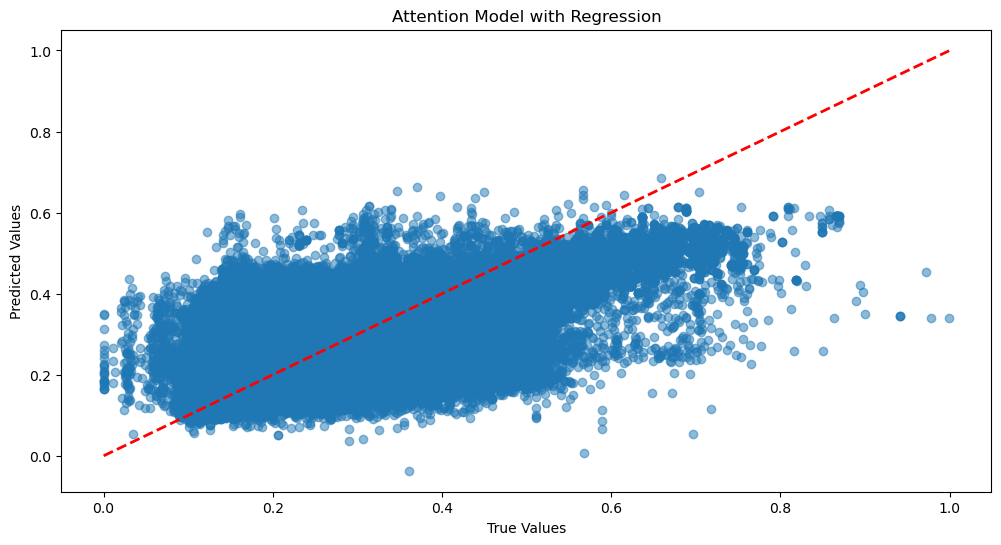

In [278]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test_13_scaled, attention_predictions, alpha=0.5)
plt.plot([min(y_test_13_scaled), max(y_test_13_scaled)], [min(y_test_13_scaled), max(y_test_13_scaled)], linestyle='--', color='red', linewidth=2)
plt.title('Attention Model with Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()